# Loan Tap
- LoanTap is an online platform committed to delivering customized loan products to millennials
- LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:
    - Personal Loan
    - EMI Free Loan
    - Personal Overdraft
    - Advance Salary Loan

# Objective of the case study
- Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?
- This case study will focus only on the underwriting process behind Personal Loan only

# Approach
- Basic Data Analysis
- Exploratory Data Analysis
    - Univariate, Bivariate, Multivariate Analysis
    - Target vs Features
- Data Preprocessing
- Statistical Tests
    - Chisquare, Anova Test
- Modeling
- Assumptions of Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
bold_start = '\033[1m'
bold_end = '\033[0m'

In [3]:
#Load Dataset
path = r"F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\LoanTap\Dataset"
#path = r"E:\Nextstep\Scaler\Business-Case-Study\LoanTap\Dataset"
raw_df = pd.read_csv(path + "\logistic_regression.csv")
pd.options.display.max_columns = raw_df.shape[1]
raw_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# Data Analysis

In [27]:
#Statistics of Dataset
pd.options.display.max_columns = raw_df.shape[1]
raw_df.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,396030,396030,396030,396030,394275,396030.000000,396030,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,3,115,2,14,48817,NaN,684,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,NaN,Oct-2000,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,139563,14846,318357,234507,152472,NaN,3017,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,NaN,NaN,NaN,NaN,NaN,17.379514,NaN,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,NaN,NaN,NaN,NaN,NaN,18.019092,NaN,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,NaN,NaN,NaN,NaN,NaN,11.280000,NaN,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,NaN,NaN,NaN,NaN,NaN,16.910000,NaN,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,NaN,NaN,NaN,NaN,NaN,22.980000,NaN,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


### Inference:
- Categorical Features
	- **term:** 36 months is the preferred tenure 
	- **grade:** Grade B is given for the majority of the customers, yet to check the ordinality of the feature
	- **sub_grade:** Subgrade B3 (Might be the subgrade of grade B) is given for the majority of the customers
	- **emp_title:** 
        - High number of unique values observed
        - Professional Teachers are looking for the loan
	- **emp_length:** 10+ years experienced professional are looking for the loan
	- **home_ownership:** Mortgaged home owners are majorly looking for the loan, as their income is already locked for EMI
	- **verification_status:** Majority of the income status of the customers are verified
	- **issue_d** (Date time)
	- **loan_status:**
        - It is the binary Target variable
        - Fully paid (Trustable Customer), Charged Off (Defaulter)
	- **purpose:** 
        - Majority of the borrowers are expecting loan to close another debt indicating the borrowers already have a debt
	- **title:**
        - High number of unique values observed
        - Majority of the borrowers are expecting loan to close another debt
	- **earliest_cr_line:**
        - Date Feature
        - Feature transformation is required before modeling
	- **initial_list_status:** Binary variable
	- **application_type:** Majority of the borrowers are individual
- Numerical Features
	- **loan_amnt:**
        - Average loan amount in the dataset is ~14000 and 500 being the lowest loan amount 
	- **int_rate:**
        - The interest rate ranges from ~5% to ~31% and the average being ~13%
	- **installment:**
        - Average installment amount is ~400 and ~16 being the lowest loan amount 
	- **annual_inc:**
        - Average annual increment mentioned by borrowers are in the range of 0 to 8.7million 
	- **dti:**
        - Difference between Q3 and max indicates the highly right skewed data
	- **open_acc:**
        - Average Open credit lines of the borrowers is ~11 
        - The Difference between Q3 and max indicates the highly right skewed data
    - **pub_rec:**
        - The Difference between Q3 and max indicates the highly right skewed data
	- **revol_bal:**
        - Average revolving balance is ~15000 while applying for the loan
	- **revol_util:**
	- **total_acc:**
        - Average number of credit lines is ~25 while applying for the loan
	- **mort_acc:**
        - Average number of mortgage accounts is ~2 while applying for the loan
        - The Difference between Q3 and max indicates the highly right skewed data
	- **pub_rec_bankruptcies:**
        - The Difference between Q3 and max indicates the highly right skewed data

In [5]:
#Characteristics of Dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [14]:
raw_df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [26]:
ser = (raw_df.isnull().sum() * 100)/len(raw_df)
print(bold_start + "% of Missing data is as follows," + bold_end)
ser[ser>0].sort_values(ascending=False)

% of Missing data is as follows,


mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
dtype: float64

### Inference:
- **Null Values** in the dataset are identified for features **mort_acc, emp_title, emp_length, title, pub_rec_bankruptcies and revol_util**
- Data is required to be cleaned

In [28]:
raw_df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

## Data Restructuring

In [34]:
raw_df['issue_d'] = pd.to_datetime(raw_df['issue_d'])
raw_df['earliest_cr_line'] = pd.to_datetime(raw_df['earliest_cr_line'])

In [51]:
pat = r'(\d+)$'
raw_df['pincode'] = raw_df['address'].str.extract(pat, flags=0, expand=True)

In [52]:
raw_df['pincode'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [85]:
raw_df.drop('address', axis=1, inplace=True)

### Inference:
- Converted issue_d and earliest_cr_line to datetime objects to facilitate analysis by month and year.
- Extracted the pincode from the complete textual address, simplifying analysis and providing more actionable insights.
- Notably, loans were applied from only 10 unique pincodes, suggesting that borrowers are concentrated in a small number of cities. This indicates that the "Loantap" business is not yet widely recognized.
- Dropped Address column from further analysis

# Exploratory Data Analysis
- Univariate Analysis
    - Categorical: *Frequency and Proportion Plots*
    - Numerical: *Distribution and Box plots*
    - *Skewness and Kurtosis*
- Bivariate Analysis
- Multivariate Analysis

In [64]:
cat_features = list(raw_df.describe(include='object').columns)
num_features = list(raw_df.describe().columns)
date_features = list(raw_df.describe(include='datetime64[ns]', datetime_is_numeric=True).columns)
print(bold_start + 'Categorical Features:' + bold_end, cat_features)
print(bold_start + 'Numerical Features:' + bold_end, num_features)
print(bold_start + 'Date Time Features:' + bold_end, date_features)

Categorical Features: ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'title', 'initial_list_status', 'application_type', 'address', 'pincode']
Numerical Features: ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
Date Time Features: ['issue_d', 'earliest_cr_line']


## Univariate Analysis

In [28]:
def univariate_plot_cat(df, feature):
    plt.figure(figsize=(12,4))   
    if df[feature].nunique() < 20:
        # Categorical Feature with categories < 20
        plt.suptitle('Univariate Analysis of ' + feature + ": Frequency and Proportion")
        plt.subplot(1,2,1)
        sns.countplot(data=df, x=feature) 
        plt.subplot(1,2,2)
        labels = df[feature].value_counts().index
        plt.pie(x=list(df[feature].value_counts()), labels=list(labels), autopct="%0.2f")        
        plt.show()
    else:
        # Categorical Feature with categories > 20
        plt.suptitle('Univariate Analysis of ' + feature + ": Top5 and Bottom-5 categories Plot")
        plt.subplot(1,2,1)
        top5 = df[feature].value_counts()[:5]
        sns.barplot(x= list(top5.index), y=top5)
        plt.subplot(1,2,2)
        bot5 = df[feature].value_counts()[-5:]
        sns.barplot(x= list(bot5.index), y=bot5)
        plt.xlabel(feature)

In [87]:
def univariate_plot_num(df, feature):
    plt.figure(figsize=(12,4))   
    # Numerical Feature
    plt.suptitle('Univariate Analysis of ' + feature + ": Distribution and Box Plot")
    plt.subplot(1,2,1)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.subplot(1,2,2)
    sns.boxplot(df[feature])
    plt.xlabel(feature)

In [82]:
def univariate_plot_date(df, feature):
    plt.figure(figsize=(12,4))   
    # Date Time Feature
    plt.suptitle('Univariate Analysis of ' + feature + ": Year and Monthwise Plot")
    plt.subplot(1,2,1)
    yr = raw_df[feature].dt.year
    sns.countplot(x=yr)
    plt.xticks(rotation = 90)
    plt.subplot(1,2,2)
    mon = raw_df[feature].dt.month_name()
    sns.countplot(x=mon)
    plt.xticks(rotation = 90)

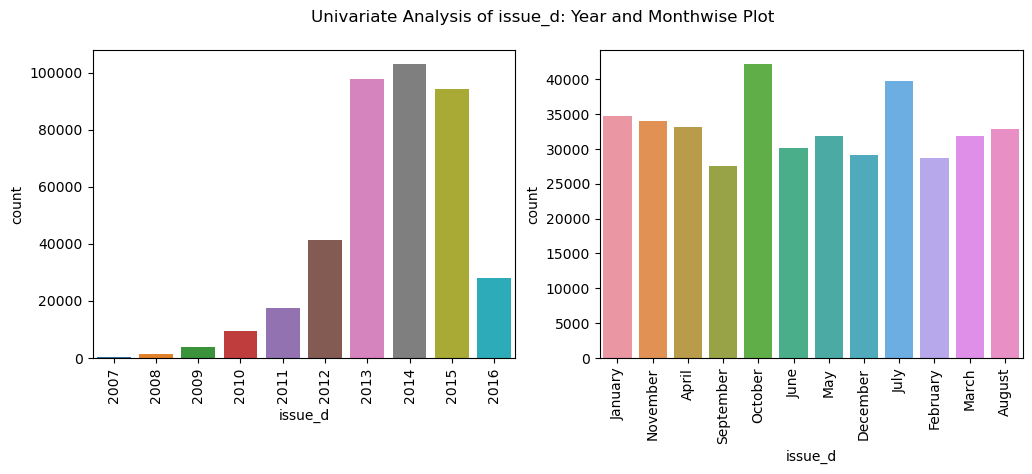

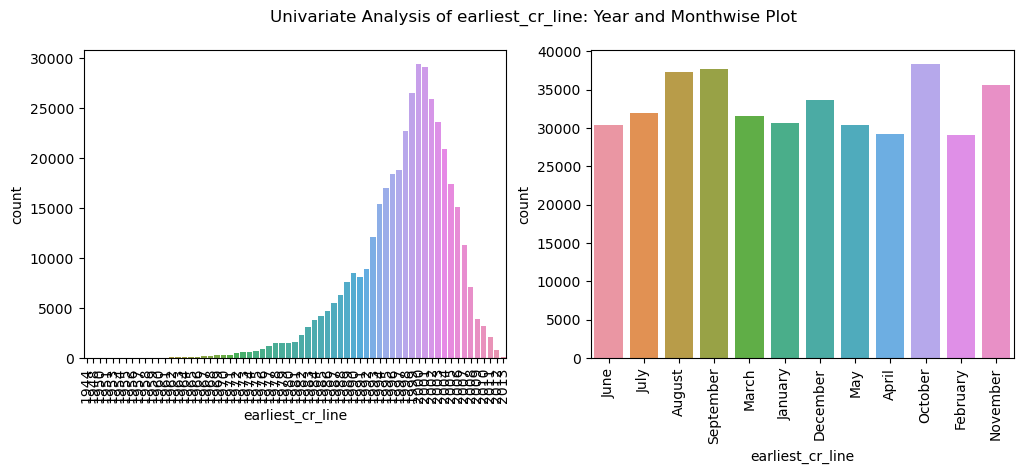

In [83]:
for feature in date_features:
    univariate_plot_date(raw_df, feature)

#### Inference:
- The majority of loans were issued between 2013 and 2015, with October and July emerging as the top two months for loan approvals
- The distribution of the earliest credit line is left-skewed and centered around the year 2000, indicating that most borrowers began their credit journey during this period

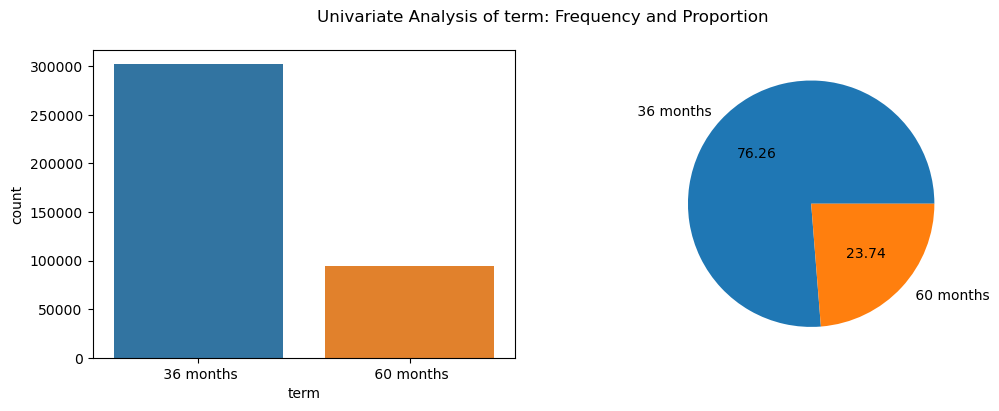

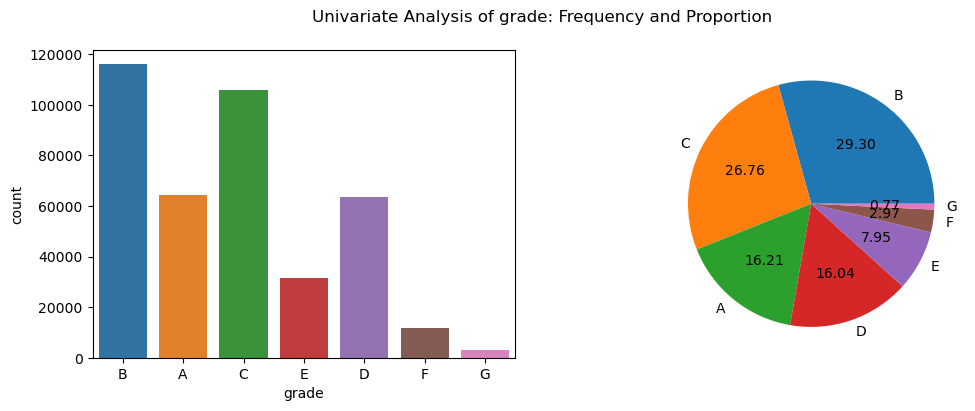

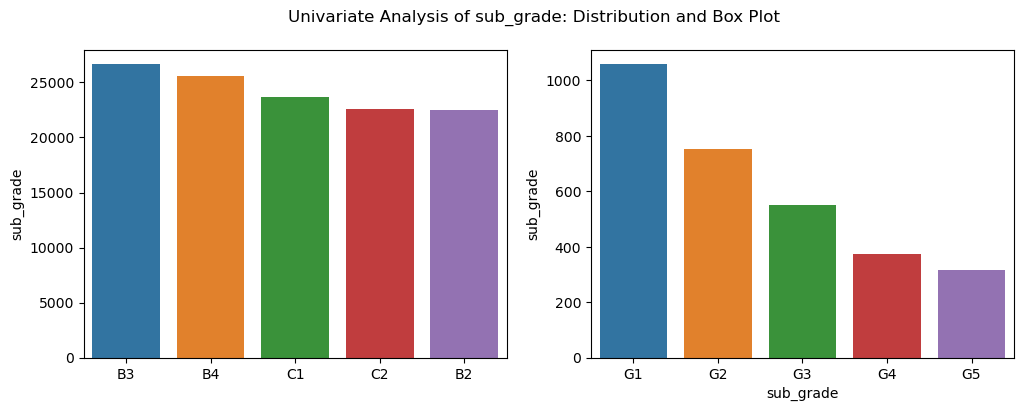

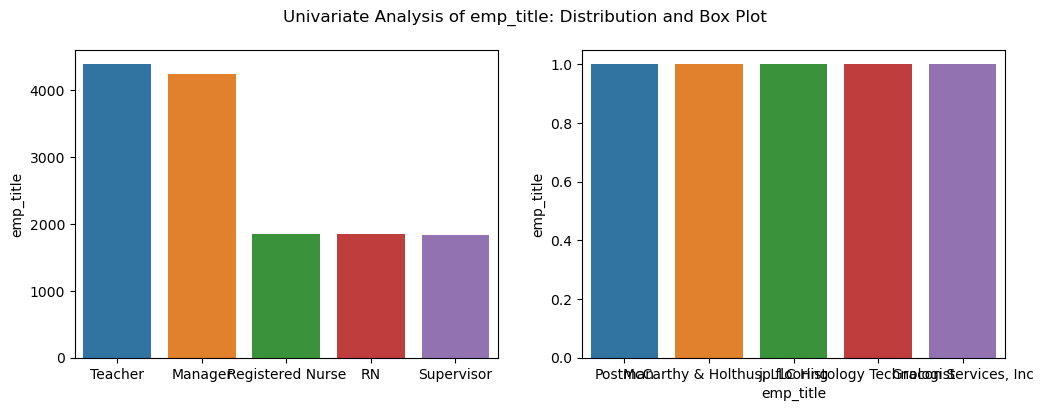

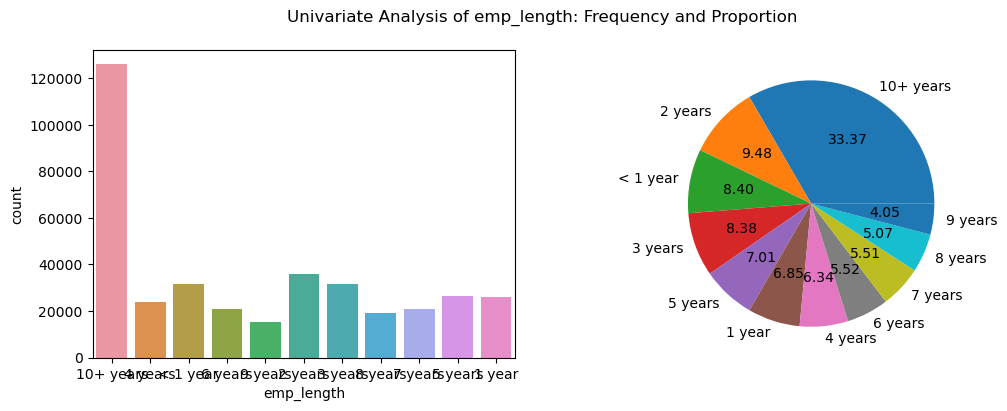

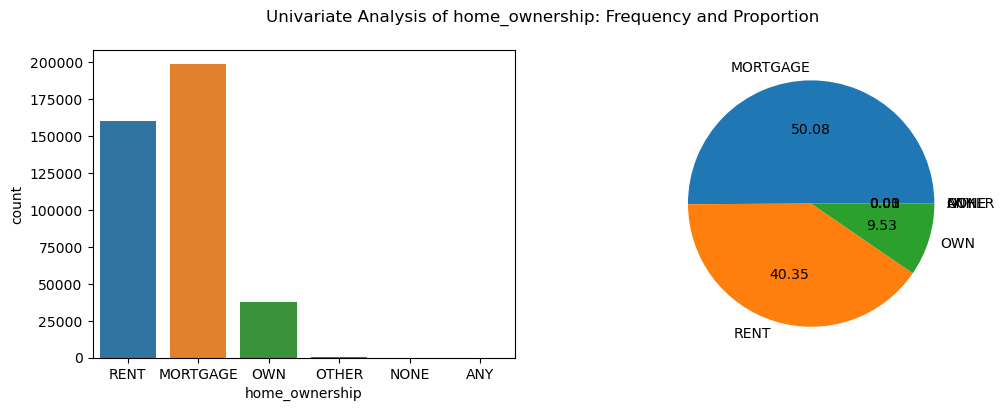

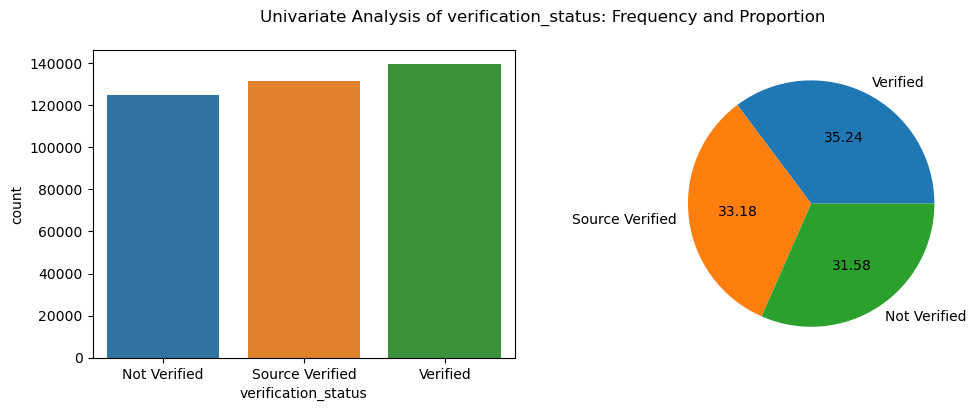

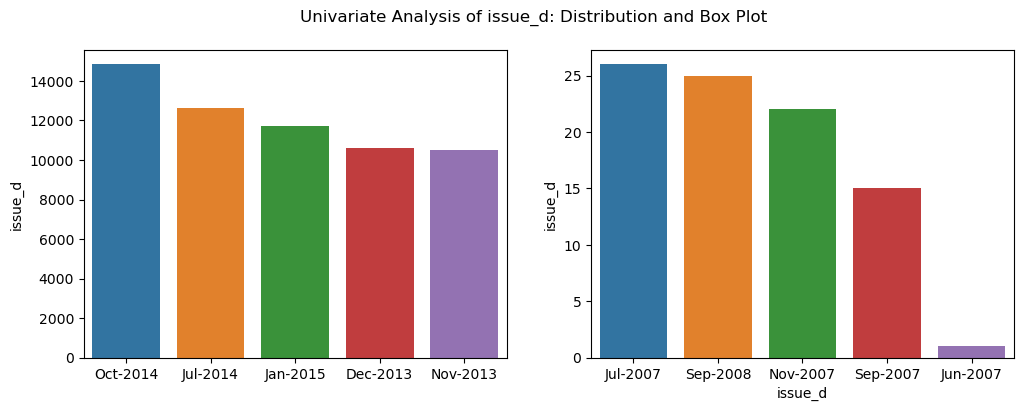

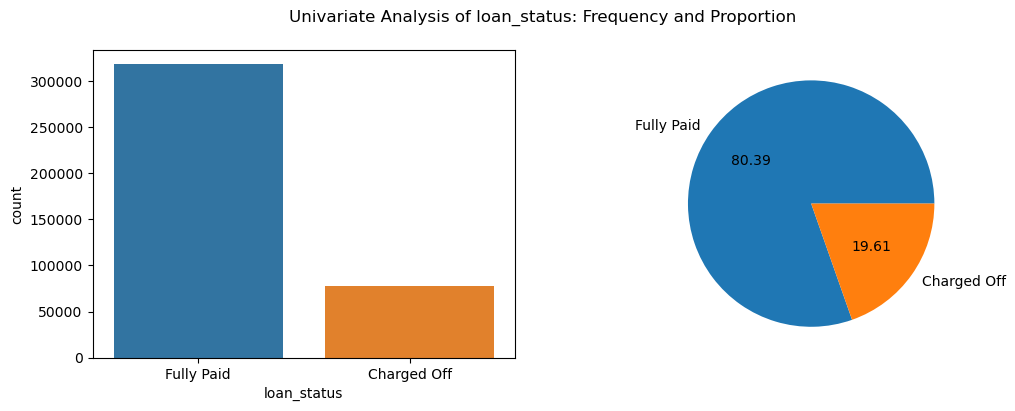

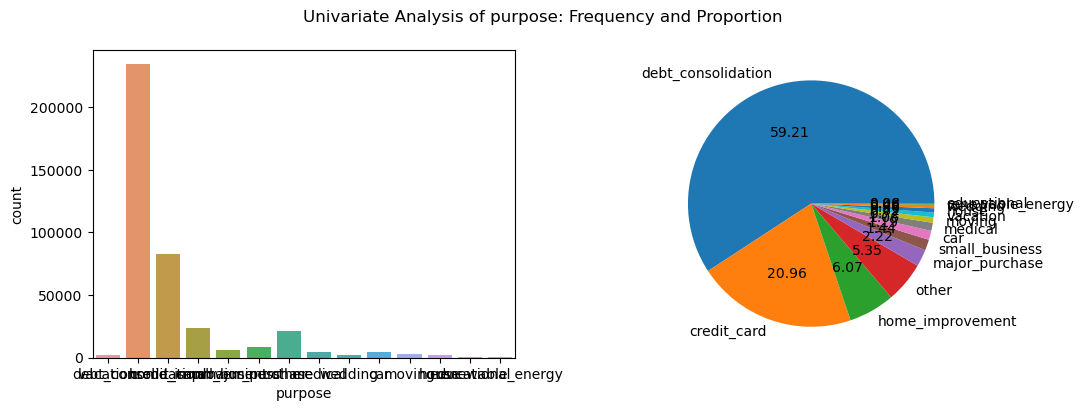

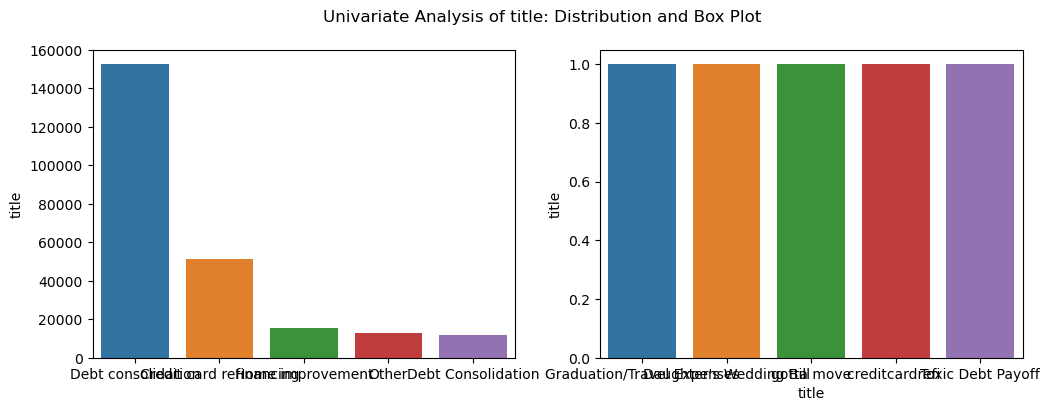

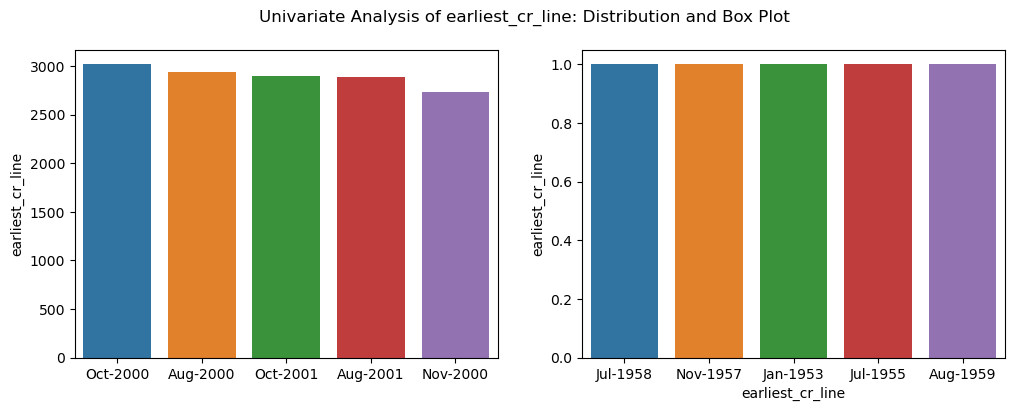

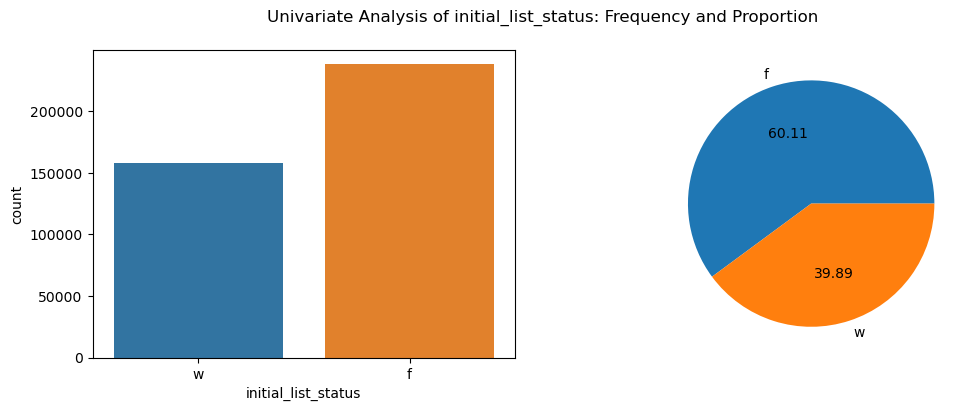

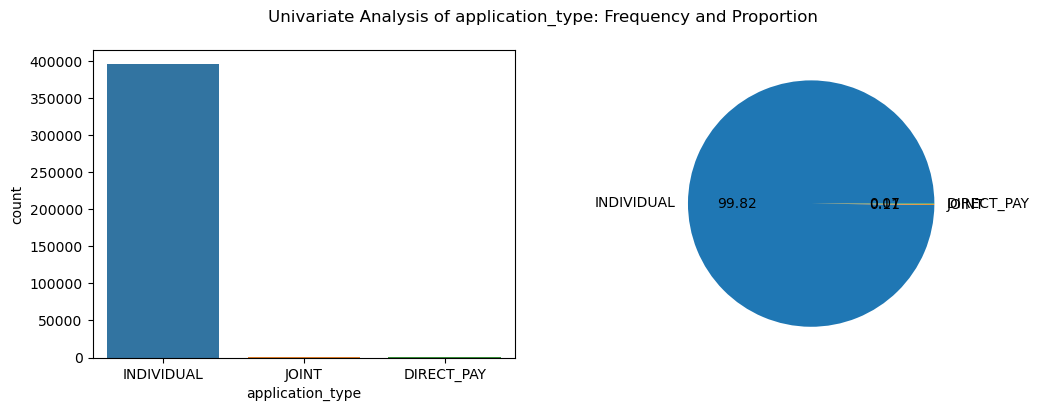

) missing from current font.\site-packages\IPython\core\events.py:93: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


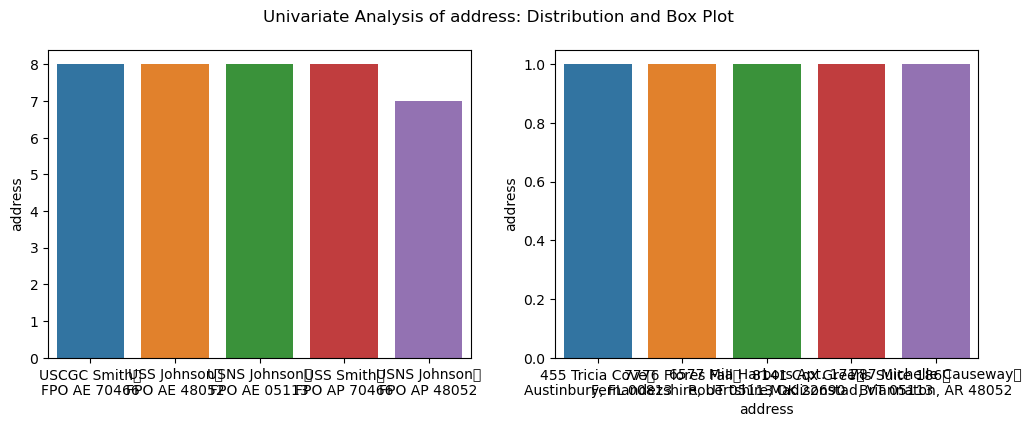

In [29]:
for feature in cat_features:
    univariate_plot_cat(raw_df, feature)

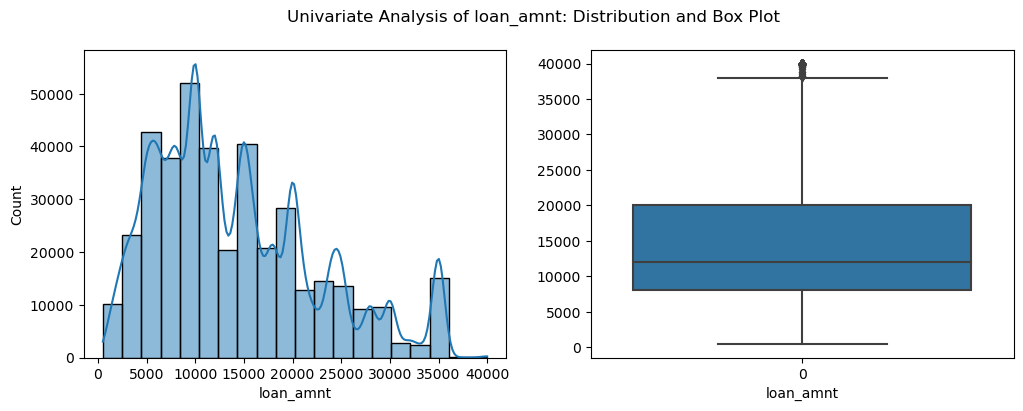

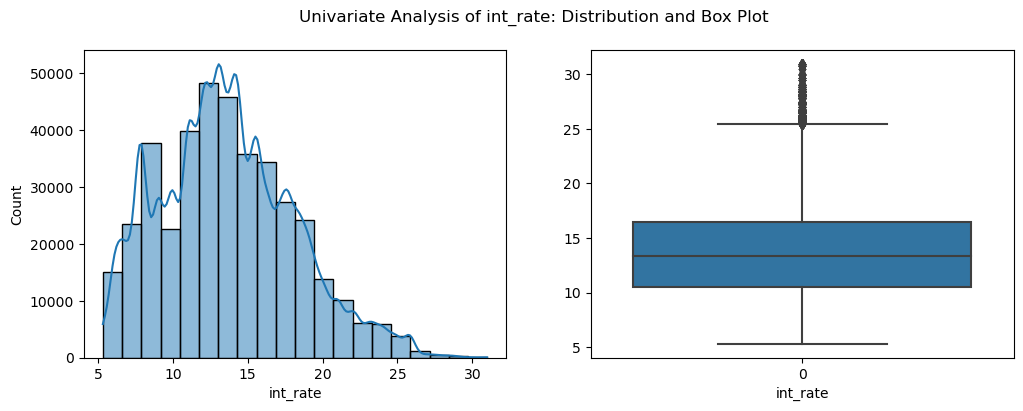

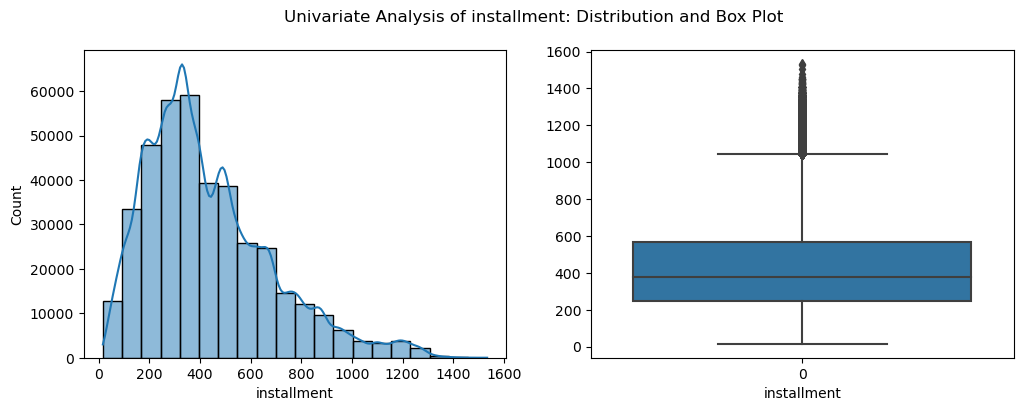

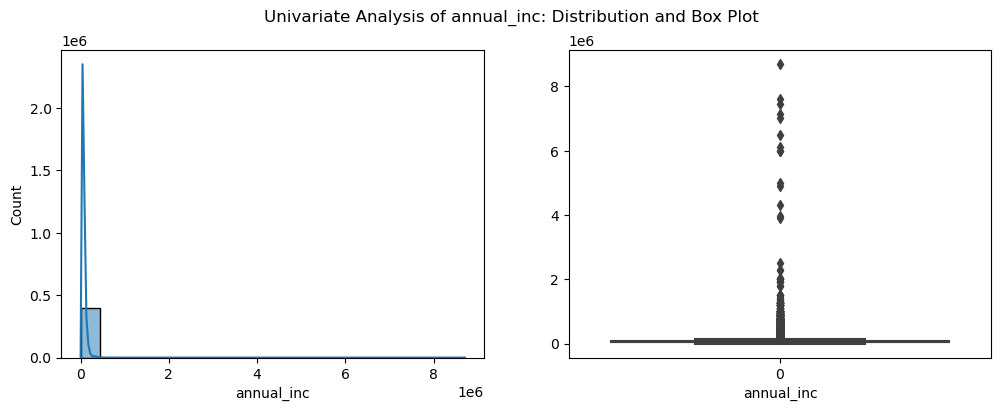

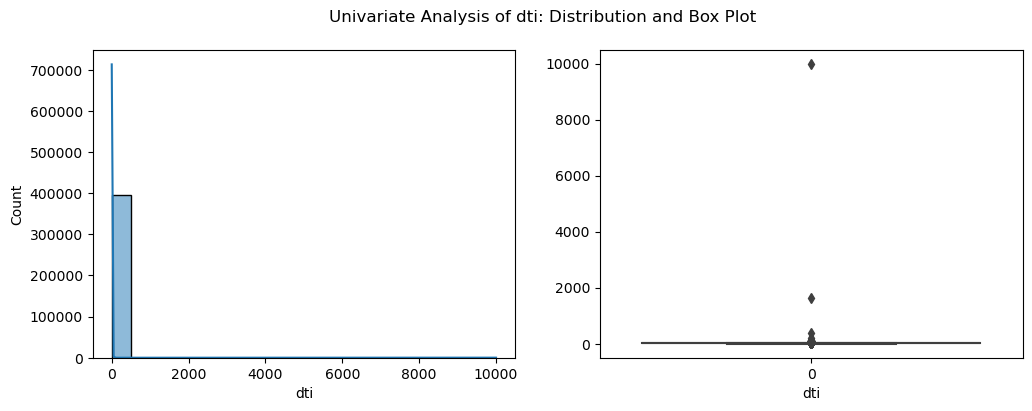

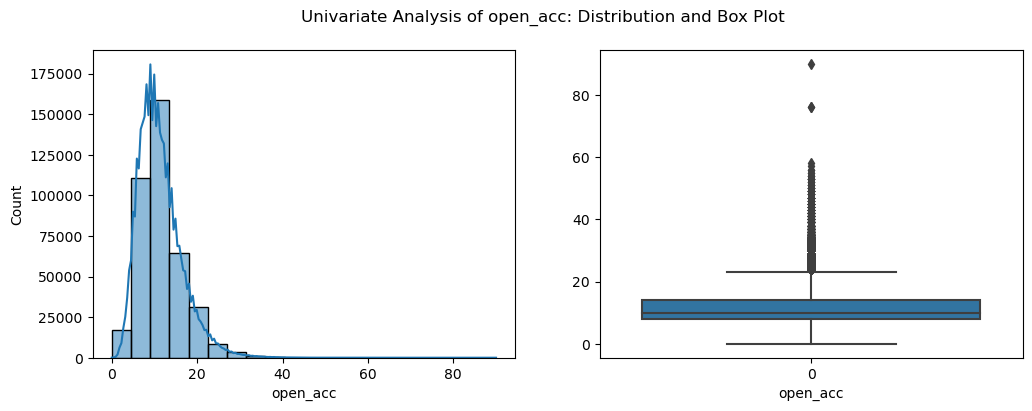

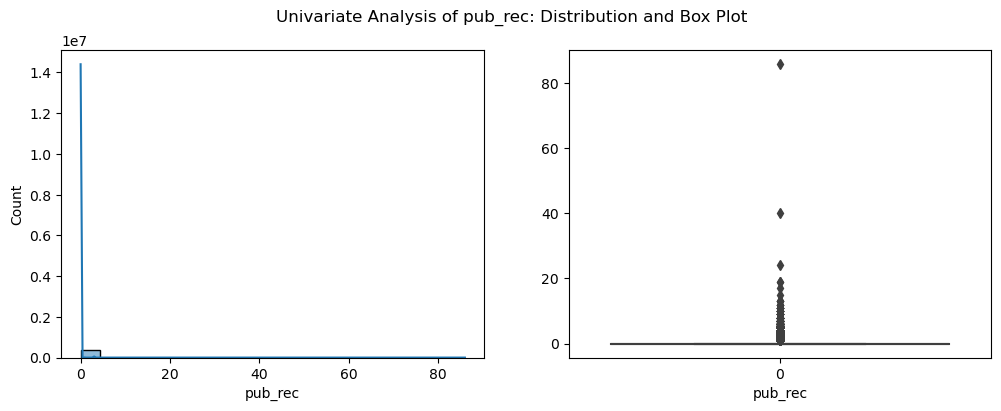

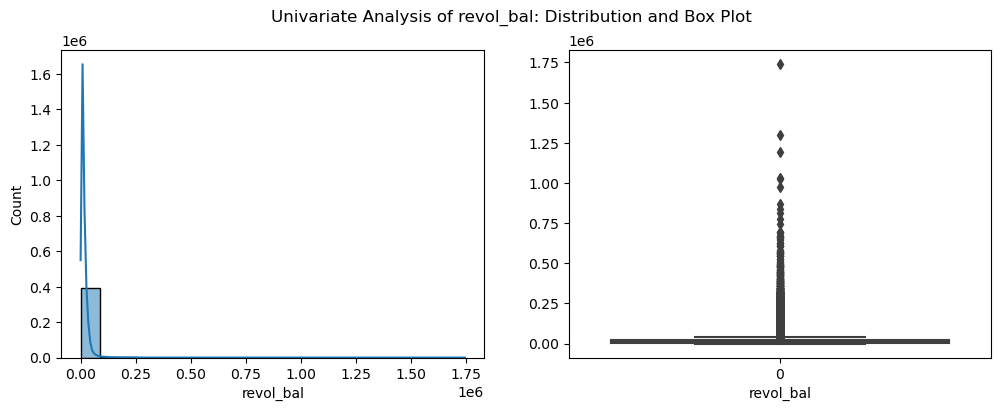

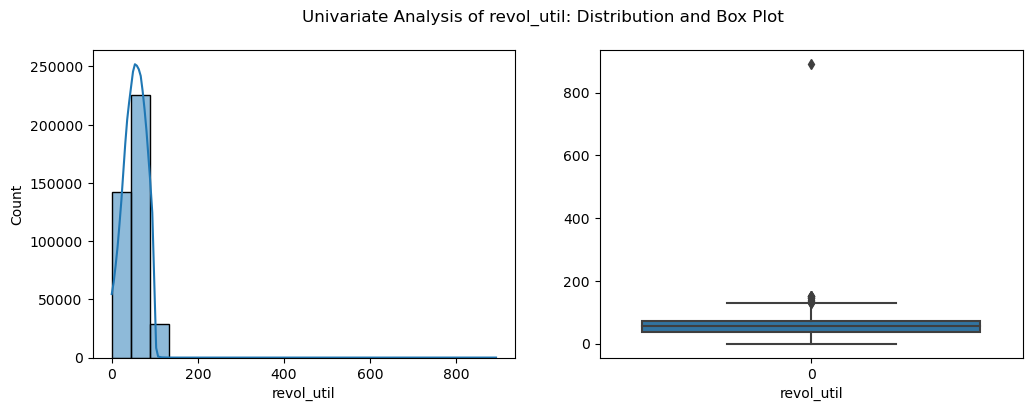

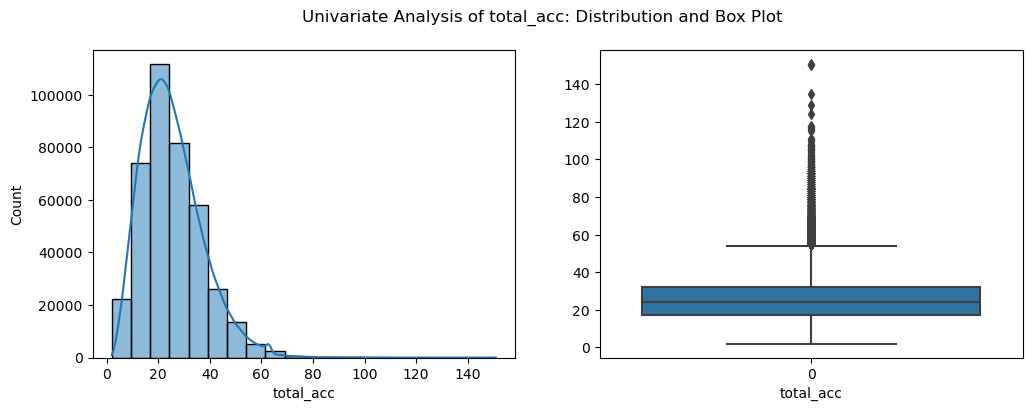

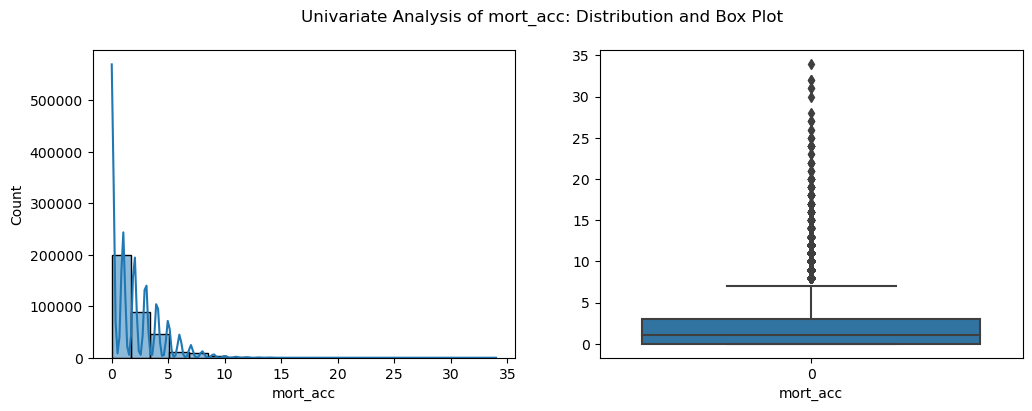

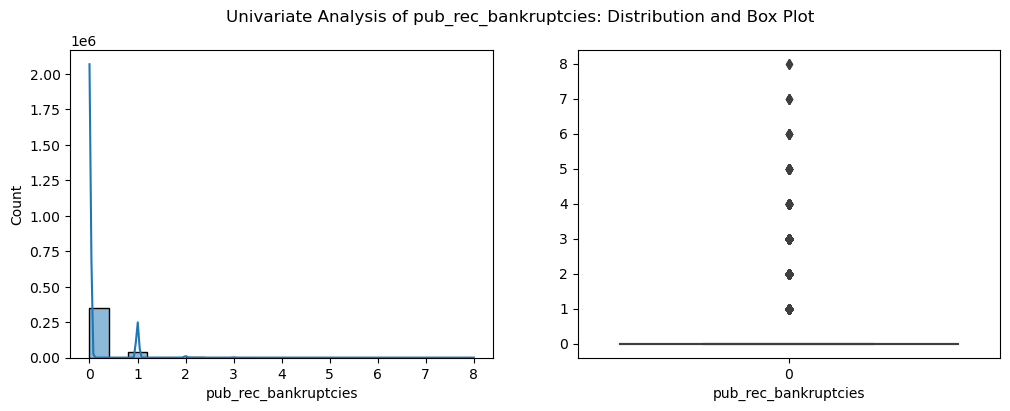

In [88]:
for feature in num_features:
    univariate_plot_num(raw_df, feature)

### Inference:
- GRE Score, TOEFL Score:
    - Data lies between inter quartile range (IQR), hence outliers doesn't exist
    - Normally distributed and spread out or flat peak
    - No missing range in the data as there are no gaps observed
- CGPA:
    - Data lies between inter quartile range (IQR), hence outliers doesn't exist
    - Normally distributed and sharp peak
    - Gap between 7 and 7.5 indicating the missing range in the data
- University Rating:
    - Ratings in the range 2-4 being 80% of proportion
    - Average rating (3) being the top most
- SOP Strength:
    - Strength in the range 2.5-4.5 being 80% of proportion
    - Average Strength (3.5 and 4.5) being the top most  
    - Lowest strength is neglegible (1.2%)
- LOR Strength:
    - Strength in the range 3-4 being ~60% of proportion
    - Average Strength (3) being the top most
    - Lowest strength is neglegible (0.2%)
- Research:
    - Almost equally distributed

In [11]:
skew_list = []
kurt_list = []
for feature in features:
    skew_list.append(np.round(skew(raw_df[feature]),2))
    kurt_list.append(np.round(kurtosis(raw_df[feature]),2))
pd.DataFrame(data=[skew_list, kurt_list], index = ['Skew', 'Kurtosis'], columns=features)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Skew,-0.04,0.10,0.09,-0.23,-0.14,-0.03,-0.24
Kurtosis,-0.72,-0.66,-0.81,-0.71,-0.75,-0.57,-1.94


### Inference:
- **GRE score** and **CGPA** are almost **symmetric**
- **TOEFL Score and University Rating** are slightly **right skewed** indicating the minimal outliers on the right side 
- **SOP, LOR and Research** are **left skewed** indicating the presence of outliers on the left side 

## Bivariate Analysis
- Categorical Vs Categorical Feature
- Numerical Vs Numerical Feature
- Categorical Vs Numerical Feature

In [6]:
num_features = [feature for feature in features if raw_df[feature].nunique() > 10]
cat_features = [feature for feature in features if raw_df[feature].nunique() <= 10]

In [7]:
cat_features

['University Rating', 'SOP', 'LOR ', 'Research']

### Categorical Feature Analysis

In [11]:
def bivariateplot1xn(df, cat_features, plot_feature):
    plt.figure(figsize=(12,4))
    n = len(cat_features)-1
    plt_count = 1
    for feature in cat_features:
        #print(feature)
        if plot_feature != feature:
            plt.suptitle(plot_feature + " vs Other features")
            plt.subplot(1,n,plt_count)
            sns.countplot(data=df[cat_features], x=feature, hue=plot_feature)
            plt_count += 1

<Axes: xlabel='University Rating', ylabel='count'>

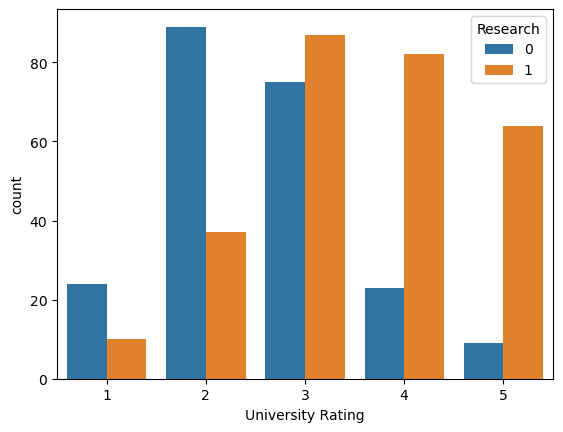

In [9]:
sns.countplot(data=raw_df[cat_features], x='University Rating', hue='Research')

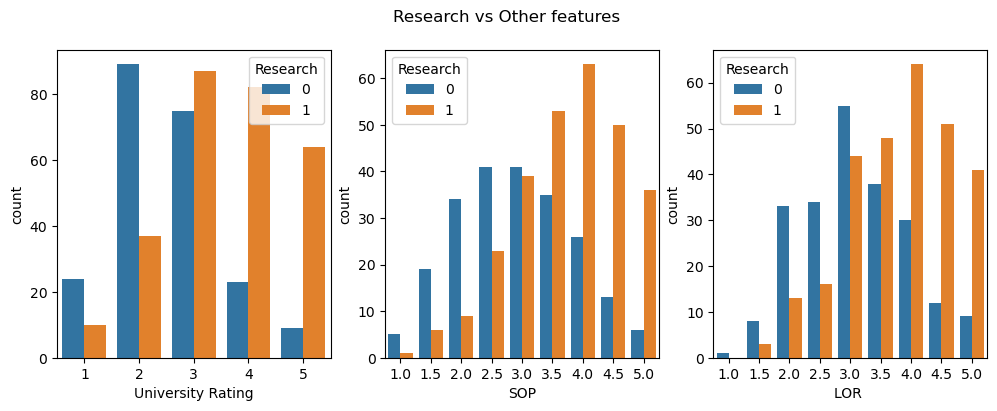

In [12]:
bivariateplot1xn(raw_df, cat_features, 'Research')

#### Inference:
- Students from universities with higher ratings (3+) are more likely to have research experience
- Students having research experience are more likely to have higher SOP and LOR strengths (3+)

<Axes: xlabel='LOR ', ylabel='University Rating'>

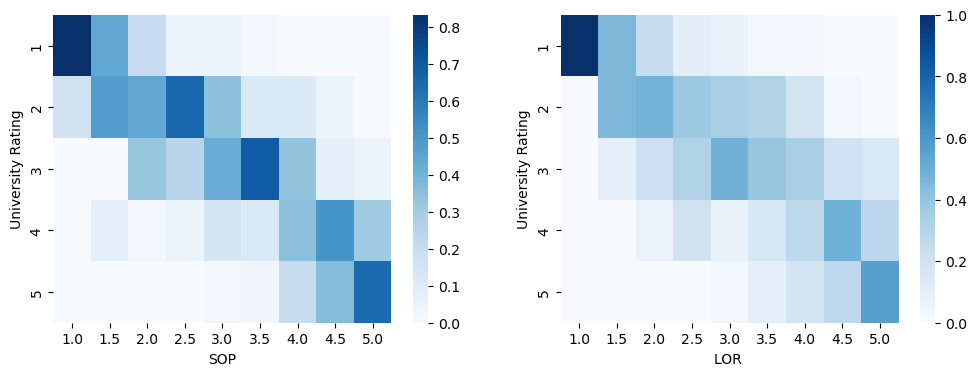

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ct = pd.crosstab(raw_df['University Rating'], raw_df['SOP'], normalize='columns')
sns.heatmap(ct, cmap='Blues')
plt.subplot(1,2,2)
ct = pd.crosstab(raw_df['University Rating'], raw_df['LOR '], normalize='columns')
sns.heatmap(ct, cmap='Blues')

<Axes: xlabel='LOR ', ylabel='SOP'>

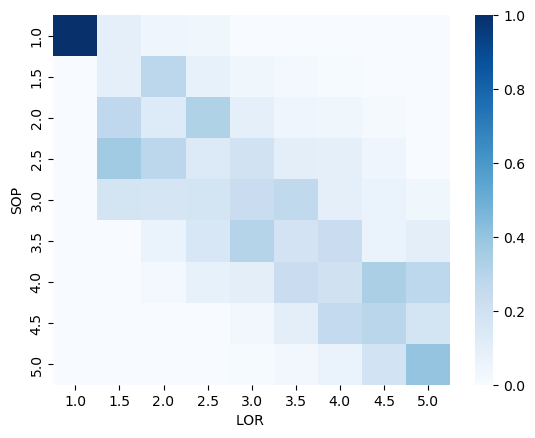

In [16]:
ct = pd.crosstab(raw_df['SOP'], raw_df['LOR '], normalize='columns')
sns.heatmap(ct, cmap='Blues')

#### Inference:
- Diagonal elements indicate a strength of relationship between the categorical features
- Strength of relationship: 
    - (University rating and SOP) > (University rating and LOR) > (SOP and LOR)

### Numerical Feature Analysis

<Figure size 1200x400 with 0 Axes>

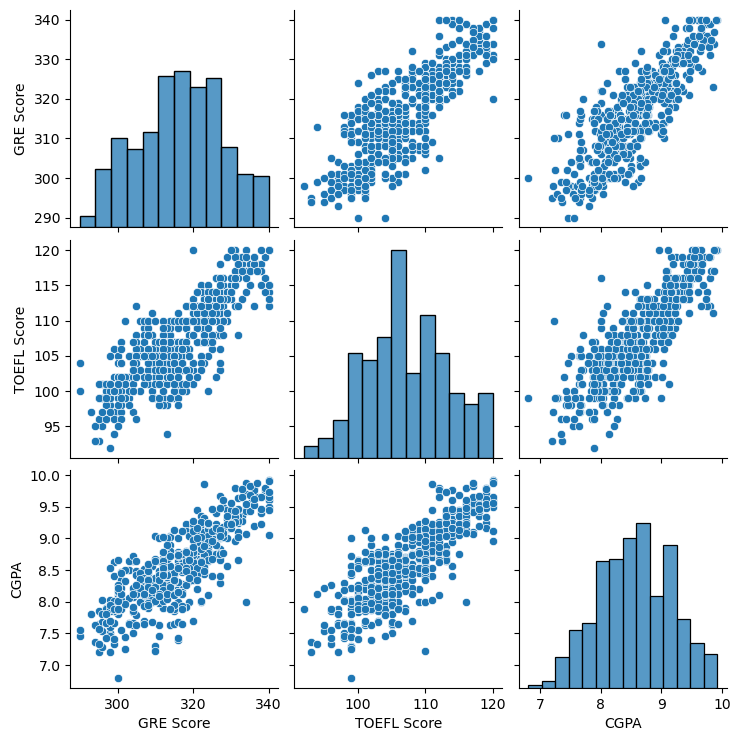

In [17]:
plt.figure(figsize=(12,4))
sns.pairplot(raw_df[num_features])

#### Inference:
- All 3 numerical features are highly linearly correlated
- Students having high CGPA are more likely to have higher GRE and TOEFL Score

### Categorical Vs Numerical Features

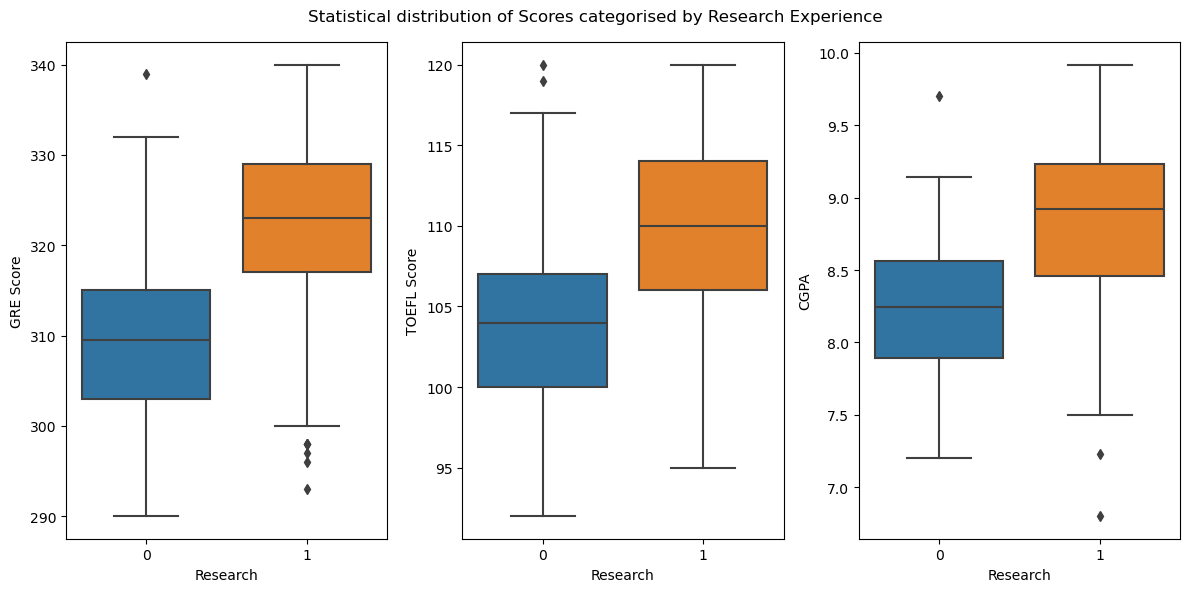

In [18]:
#Research Experience Vs Numerical Features
plt.figure(figsize=(12,6))
plt.suptitle('Statistical distribution of Scores categorised by Research Experience')
plt.subplot(1,3,1)
sns.boxplot(data=raw_df, y= 'GRE Score', x='Research')
plt.subplot(1,3,2)
sns.boxplot(data=raw_df, y= 'TOEFL Score', x='Research')
plt.subplot(1,3,3)
sns.boxplot(data=raw_df, y= 'CGPA', x='Research')
plt.tight_layout()

#### Inference:
- Students having research experience are mostly likely to get higher scores in GRE, TOEFL and Curriculum
- Very few outliers are observed indicating the need for outlier treatment on the dataset

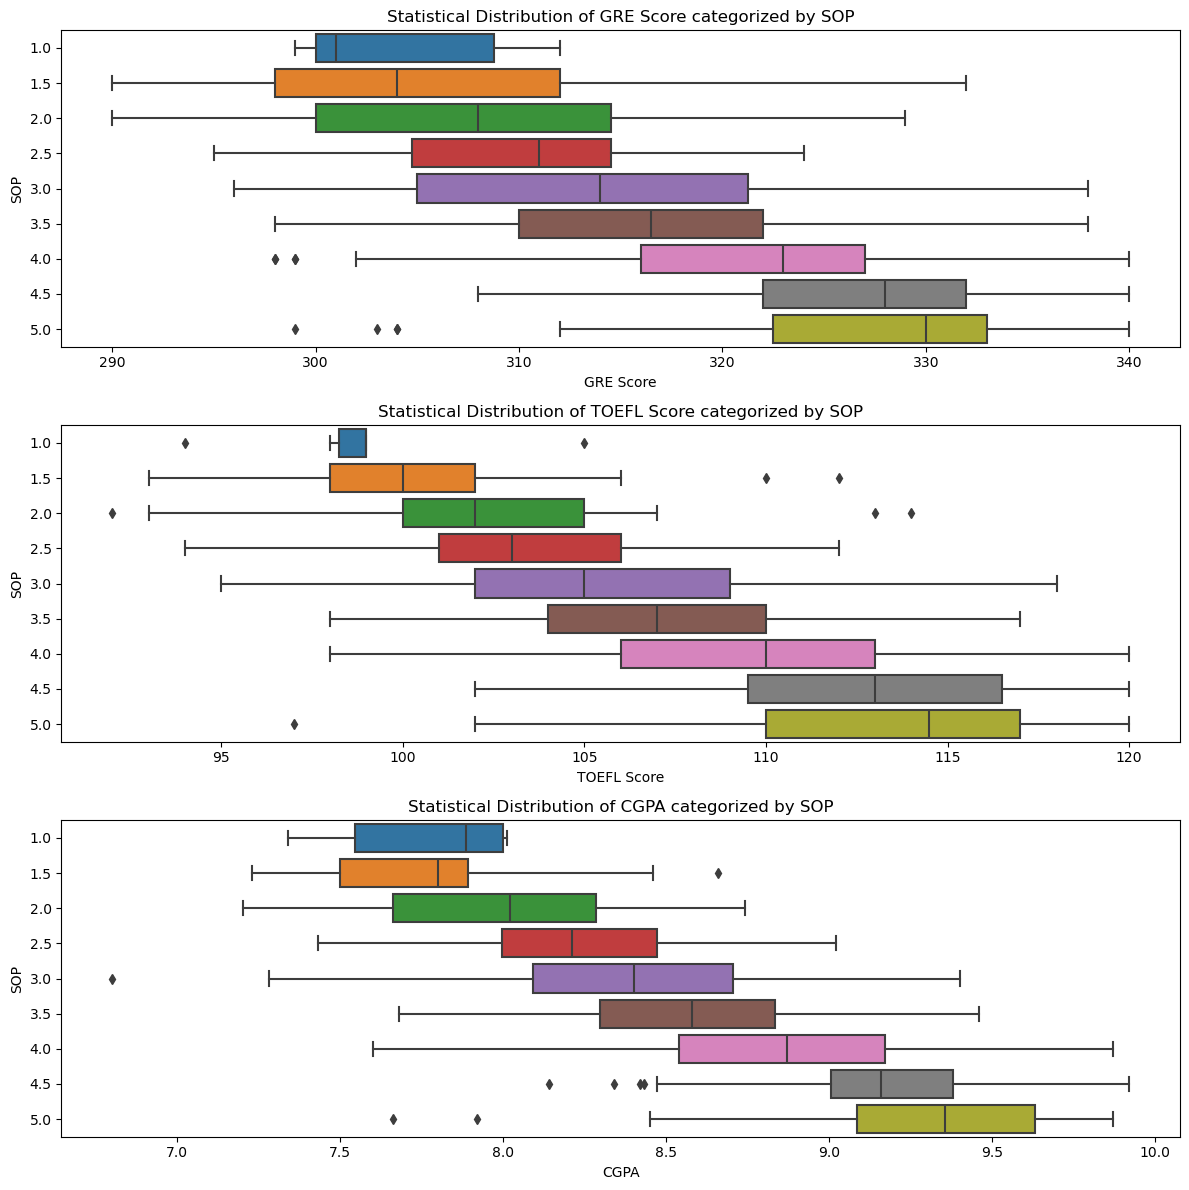

In [19]:
#SOP Vs Numerical Features
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
sns.boxplot(data=raw_df, x= 'GRE Score', y='SOP', orient='h')
plt.title("Statistical Distribution of GRE Score categorized by SOP")
plt.subplot(3,1,2)
sns.boxplot(data=raw_df, x= 'TOEFL Score', y='SOP', orient='h')
plt.title("Statistical Distribution of TOEFL Score categorized by SOP")
plt.subplot(3,1,3)
sns.boxplot(data=raw_df, x= 'CGPA', y='SOP', orient='h')
plt.title("Statistical Distribution of CGPA categorized by SOP")
plt.tight_layout()

#### Inference:
- Clear trend is evident between SOP and Scores
- Students scored more in the GRE, TOEFL and Curriculum are having higher SOP strength

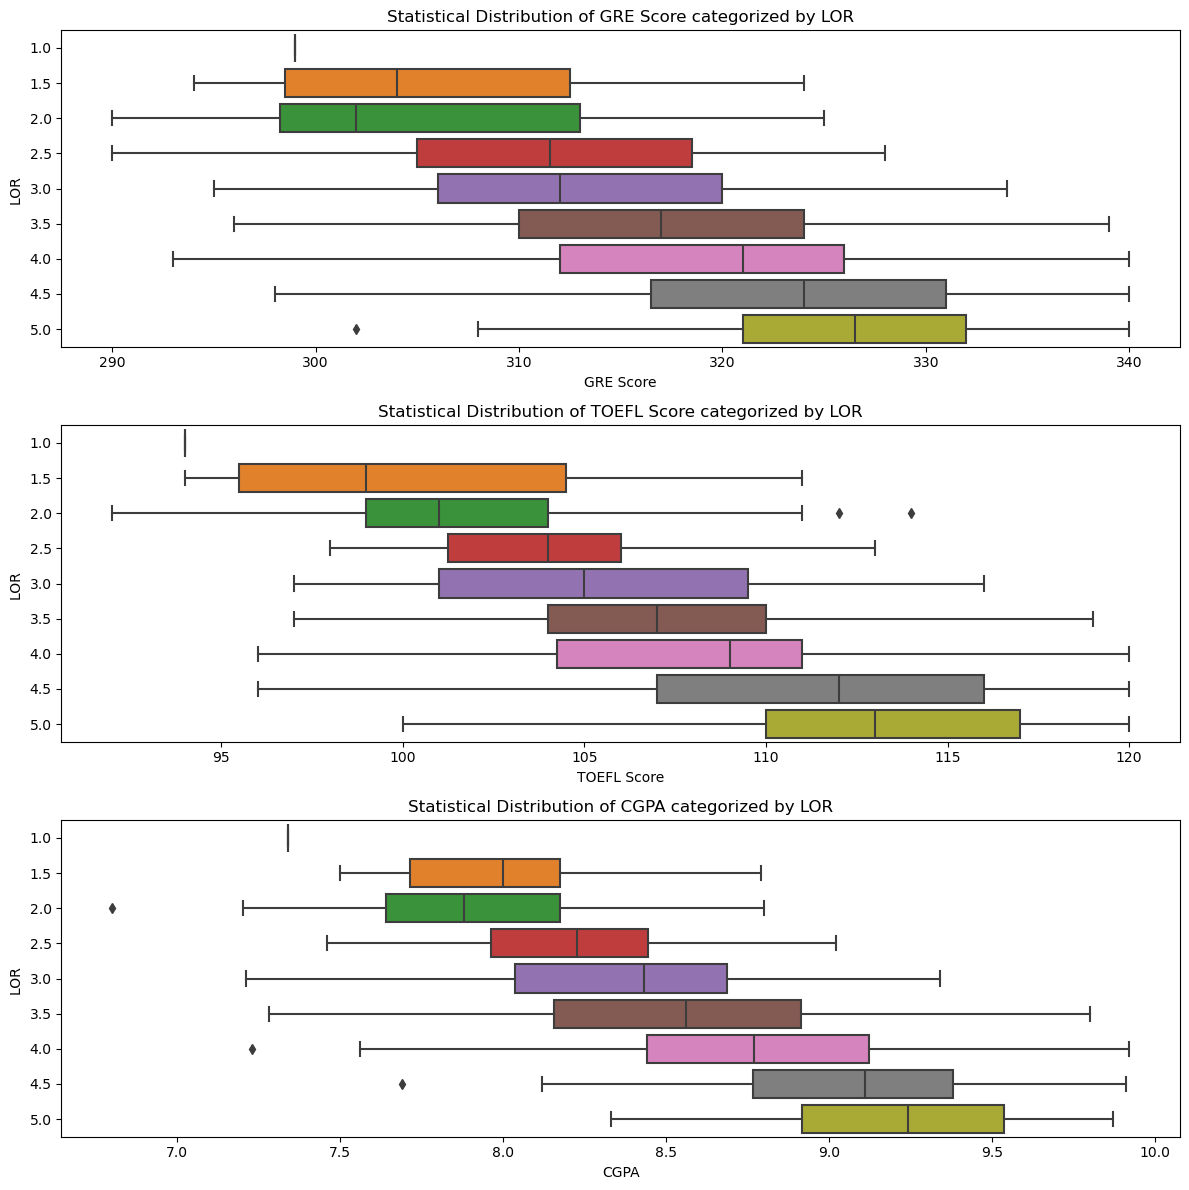

In [20]:
#LOR Vs Numerical Features
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
sns.boxplot(data=raw_df, x= 'GRE Score', y='LOR ', orient='h')
plt.title("Statistical Distribution of GRE Score categorized by LOR")
plt.subplot(3,1,2)
sns.boxplot(data=raw_df, x= 'TOEFL Score', y='LOR ', orient='h')
plt.title("Statistical Distribution of TOEFL Score categorized by LOR")
plt.subplot(3,1,3)
sns.boxplot(data=raw_df, x= 'CGPA', y='LOR ', orient='h')
plt.title("Statistical Distribution of CGPA categorized by LOR")
plt.tight_layout()

#### Inference:
- Clear trend is evident between LOP and Scores
- Students scored more in the GRE, TOEFL and Curriculum are having higher LOR strength
- Grouping the categories can provide more insights

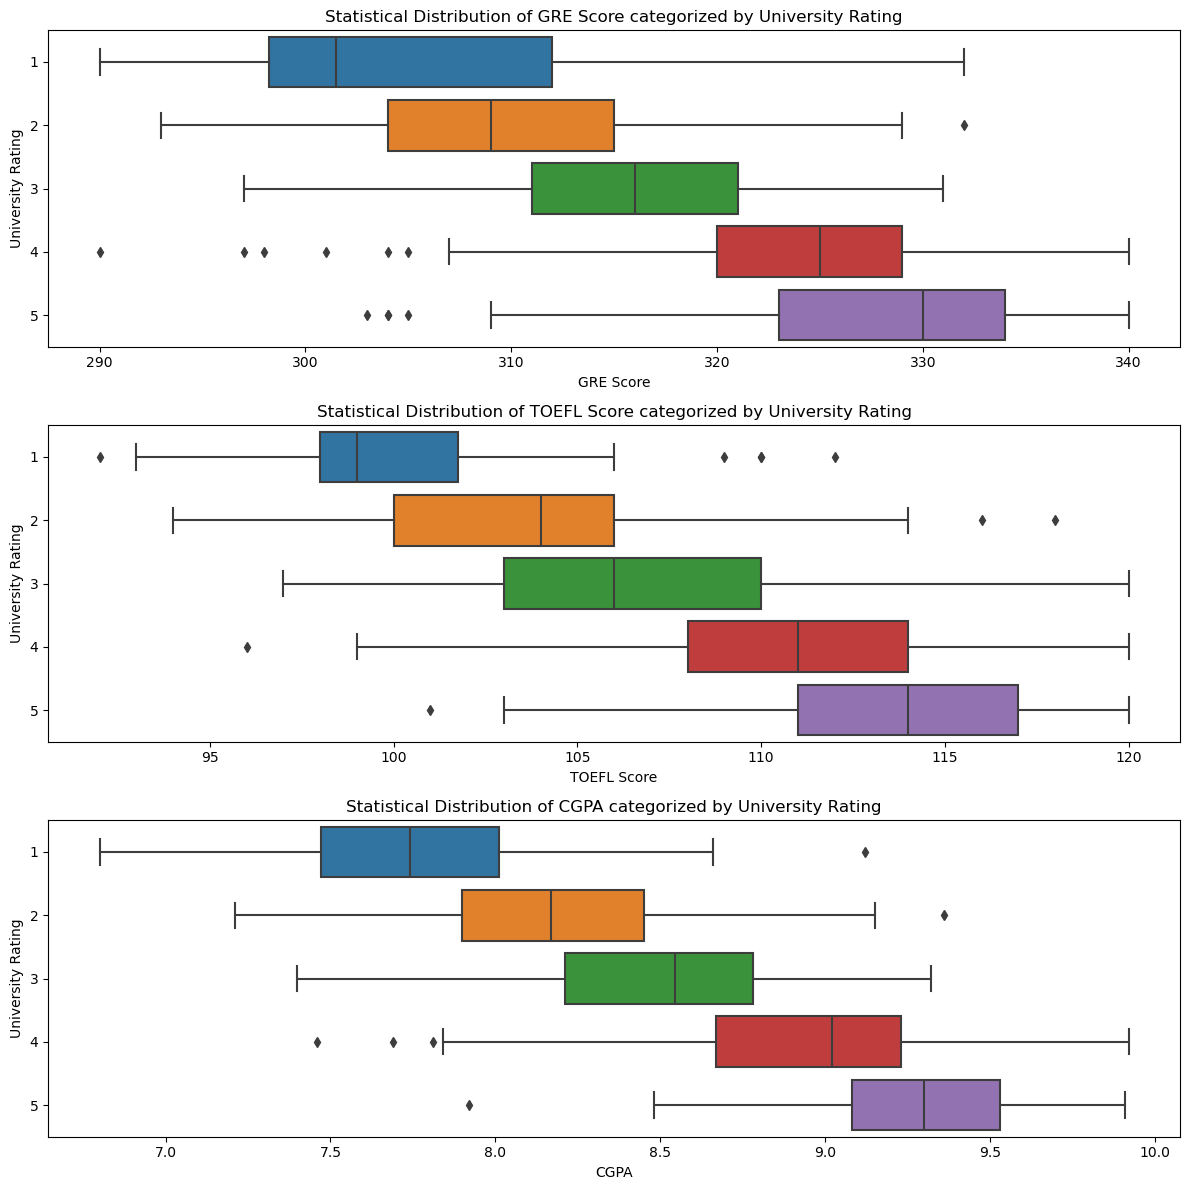

In [21]:
#University Rating Vs Numerical Features
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
sns.boxplot(data=raw_df, x= 'GRE Score', y='University Rating', orient='h')
plt.title("Statistical Distribution of GRE Score categorized by University Rating")
plt.subplot(3,1,2)
sns.boxplot(data=raw_df, x= 'TOEFL Score', y='University Rating', orient='h')
plt.title("Statistical Distribution of TOEFL Score categorized by University Rating")
plt.subplot(3,1,3)
sns.boxplot(data=raw_df, x= 'CGPA', y='University Rating', orient='h')
plt.title("Statistical Distribution of CGPA categorized by University Rating")
plt.tight_layout()

#### Inference:
- Clear steep trend is evident between University Rating and Scores
- Students scored more in the GRE, TOEFL and Curriculum are from highly rated universities
- Grouping the categories can provide more insights

## Multivariate Analysis
- All 3 Numerical Feature
- 1 Numerical vs 3 Categorical Feature  (Binned)

In [22]:
df = raw_df.copy()
df['UR_Binned'] = pd.cut(df['University Rating'], bins = [0,2,3,5], labels=['Low', 'Average', 'High'])
df['SOP_Binned'] = pd.cut(df['SOP'], bins = [0,2,3.5,5], labels=['Low', 'Average', 'High'])
df['LOR_Binned'] = pd.cut(df['LOR '], bins = [0,2,3.5,5], labels=['Low', 'Average', 'High'])

<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

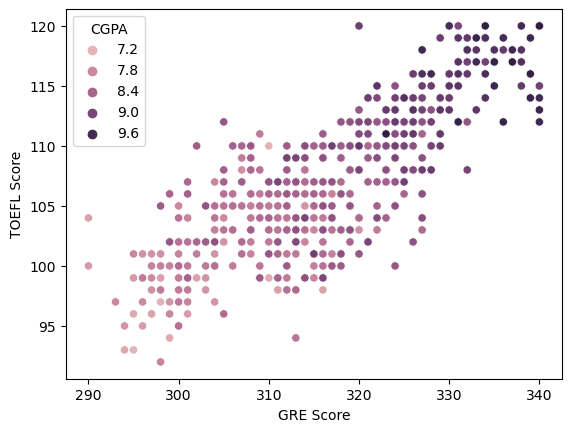

In [23]:
sns.scatterplot(data = df, x = 'GRE Score', y = 'TOEFL Score', hue='CGPA')

## Target Variable Analysis
- UVA of Target 
- BVA with each numerical and categorical features
- Target correlation with Features

### UVA - Target (Chance of Admit)

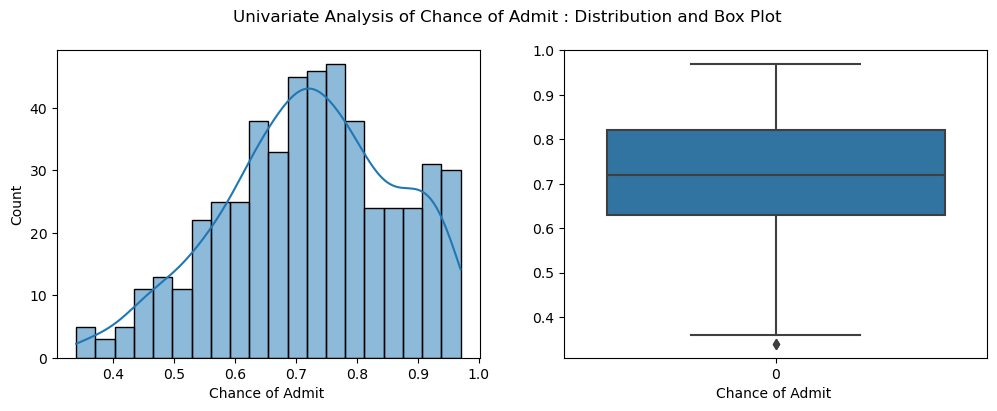

In [24]:
univariate_plot(raw_df, 'Chance of Admit ')

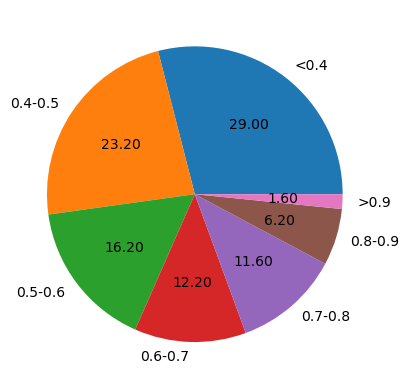

In [25]:
labels = ["<0.4", "0.4-0.5", "0.5-0.6", "0.6-0.7", "0.7-0.8", "0.8-0.9", ">0.9"]
target = pd.cut(raw_df['Chance of Admit '], bins=[0, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], labels=labels)
plt.pie(x=list(target.value_counts()), labels=labels, autopct="%0.2f") 
plt.show()

#### Inference:
- Unbalanced dataset with relatively left skewed
- Median is around 0.7
- High confidence results (>0.7) are less <25%
- 0.4 to 0.7 confidence range occupies 50% of dataset

### BVA - Target vs Features

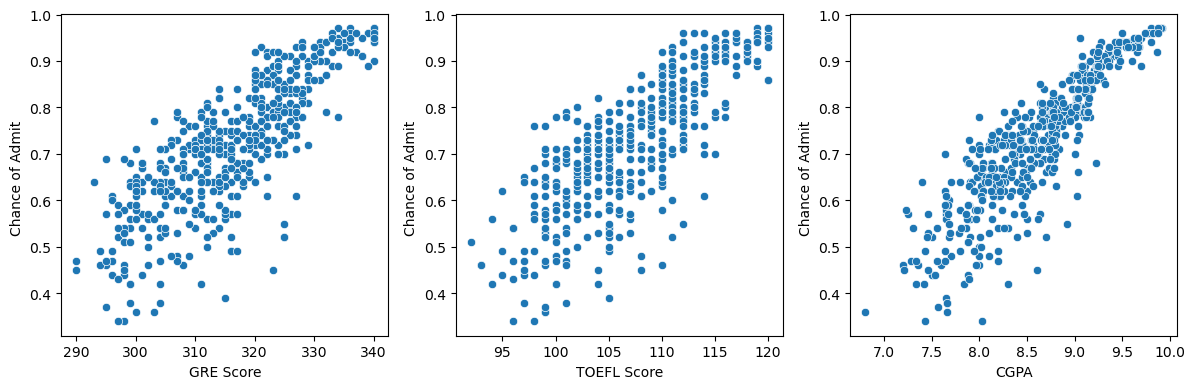

In [26]:
plt.figure(figsize=(12, 4))
for i in range(len(num_features)):
    plt.subplot(1,3,i+1)
    sns.scatterplot(x=raw_df[num_features[i]], y = raw_df['Chance of Admit '])
plt.tight_layout()

#### Inference:
- GRE Score, TOEFL Score and CGPA all are linearly correlated with Chance of Admission
- Variance of TOEFL Score > GRE Score > CGPA
- In other words, the range of toefl score is braod for getting an admission 
- Higher the score the higher chance of getting an admission

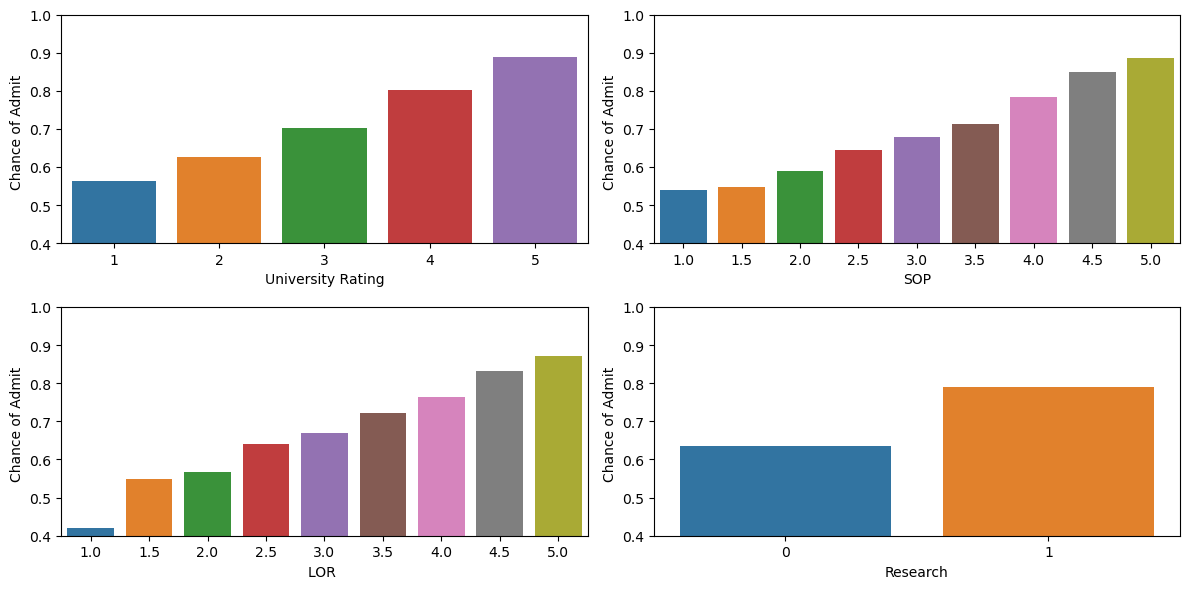

In [27]:
plt.figure(figsize=(12, 6))
for i in range(len(cat_features)):
    plt.subplot(2,2,i+1)
    sns.barplot(data = raw_df, x = cat_features[i], y = 'Chance of Admit ', estimator='mean', errorbar=None)
    plt.ylim(0.4, 1)
plt.tight_layout()

#### Inference:
- University rating, SOP, LOR and Research experience are positively and linearly correlated with Chance of Admission
- Higher the rating the higher the chance of getting an admission

### Feature Correlation with Target

(0.4, 0.9265332036498027)

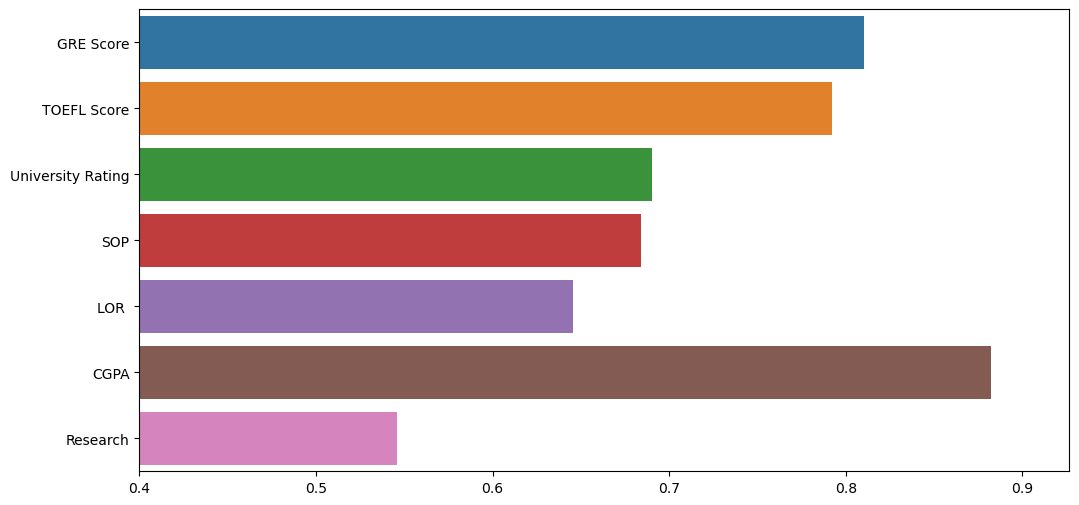

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(raw_df.drop("Serial No.", axis=1).corr().iloc[-1])[:-1], y=list(raw_df.drop("Serial No.", axis=1).columns)[:-1], orient='h')
plt.xlim(0.4)

#### Inference:
- GRE, TOEFL Score and CGPA are highly correlated with the Target

# Data Preprocessing
- Missing data analysis
- Outlier Treatment if necessary
- Feature Engineering
- Feature Scaling

## Null and Outlier Analysis

In [29]:
raw_df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

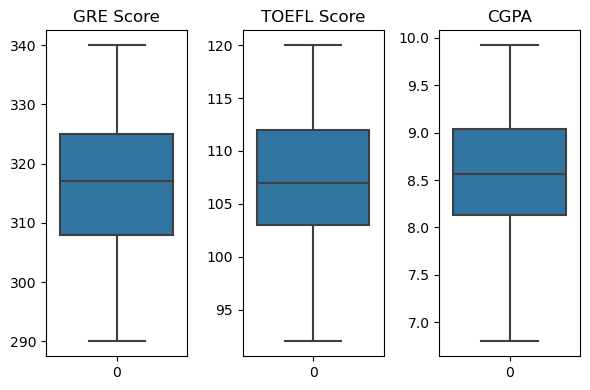

In [30]:
cnt = 1
plt.figure(figsize=(6,4))
for feature in num_features:
    plt.subplot(1, len(num_features), cnt)
    sns.boxplot(raw_df[feature])
    plt.title(feature)
    cnt += 1
plt.tight_layout()

#### Inference:
- No Null values are observed
- No outliers detected in numerical features

<Axes: ylabel='SOP'>

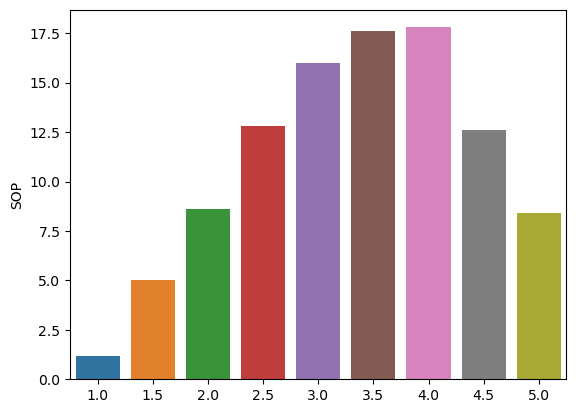

In [31]:
percent_split = (raw_df['SOP'].value_counts()*100/raw_df['SOP'].value_counts().sum()).sort_index()
sns.barplot(y = percent_split, x = percent_split.index)

<Axes: ylabel='LOR '>

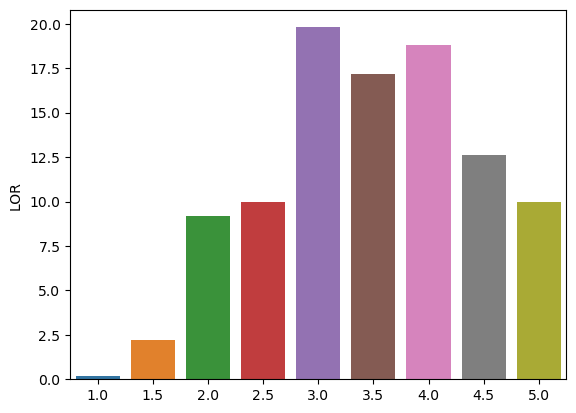

In [32]:
percent_split = (raw_df['LOR '].value_counts()*100/raw_df['LOR '].value_counts().sum()).sort_index()
sns.barplot(y = percent_split, x = percent_split.index)

<Axes: ylabel='University Rating'>

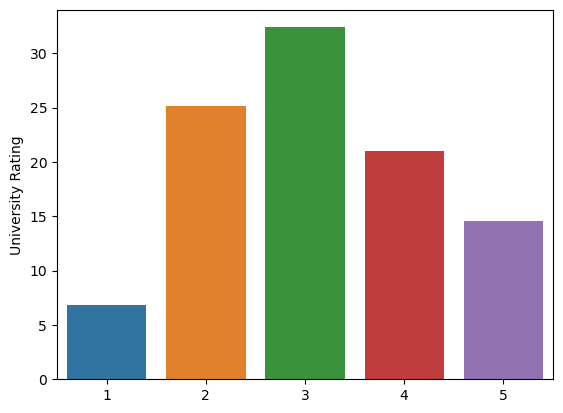

In [33]:
percent_split = (raw_df['University Rating'].value_counts()*100/raw_df['University Rating'].value_counts().sum()).sort_index()
sns.barplot(y = percent_split, x = percent_split.index)

In [34]:
percent_split

1     6.8
2    25.2
3    32.4
4    21.0
5    14.6
Name: University Rating, dtype: float64

#### Inference:
- SOP: 1, 1.5 and 2.0 can be merged, 4.5 and 5.0 can be merged 
- LOR: 1, 1.5, 2.0 and 2.5 can be merged, 4.5 and 5.0 can be merged 
- University Rating: 1 and 2 can be merged, 4 and 5 can be merged 

## Feature Engineering:
- Merge Categories
- PCA
- Feature Scaling

In [35]:
df.drop('Serial No.', axis=1, inplace=True)

In [36]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,UR_Binned,SOP_Binned,LOR_Binned
0,337,118,4,4.5,4.5,9.65,1,0.92,High,High,High
1,324,107,4,4.0,4.5,8.87,1,0.76,High,High,High
2,316,104,3,3.0,3.5,8.00,1,0.72,Average,Average,Average
3,322,110,3,3.5,2.5,8.67,1,0.80,Average,Average,Average
4,314,103,2,2.0,3.0,8.21,0,0.65,Low,Low,Average


In [37]:
def MapElements(df, feature):
    d = dict(map(lambda i, j: (i,j), sorted(df[feature].unique()), np.arange(1, len(df[feature].unique())+1)))
    return df[feature].map(d)

In [38]:
# Bin the elements
df['SOP'] = df['SOP'].apply(lambda x: 2 if x < 2 else (5 if x > 4 else x))
df['LOR '] = df['LOR '].apply(lambda x: 2 if x < 3 else (5 if x > 4 else x))
df['University Rating'] = df['University Rating'].apply(lambda x: 2 if x < 3 else (5 if x > 3 else x))

#Transform or Map the elements
df['SOP'] = MapElements(df, 'SOP')
df['LOR '] = MapElements(df, 'LOR ')
df['University Rating'] = MapElements(df, 'University Rating')

In [39]:
print("Unique values of SOP:", sorted(df['SOP'].unique()))
print("Unique values of LOR:", sorted(df['LOR '].unique()))
print("Unique values of University Rating:", sorted(df['University Rating'].unique()))

Unique values of SOP: [1, 2, 3, 4, 5, 6]
Unique values of LOR: [1, 2, 3, 4, 5]
Unique values of University Rating: [1, 2, 3]


#### Inference:
- University Rating, SOP, LOR are transformed to comparable ordinal data

In [40]:
## Principal Component Analysis

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [42]:
n = len(num_features) + len(cat_features)
pl = Pipeline([
    ('Scaling', StandardScaler()),
    ('PCA', PCA(n_components=n))
])

In [43]:
valid_col = num_features + cat_features
pl.fit(raw_df[valid_col])
pca_features = pl.transform(raw_df[valid_col])
pca_model = pl.named_steps['PCA']

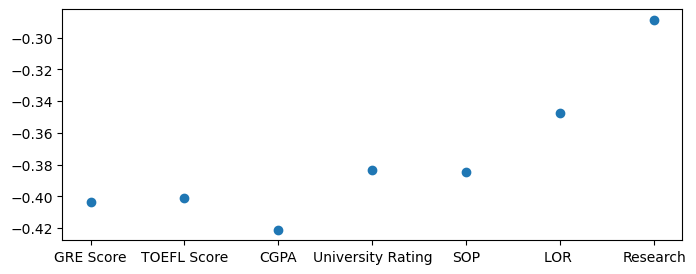

In [44]:
plt.figure(figsize=(8,3))
plt.plot(valid_col, pca_model.components_[0],'o')

#### Inference:
- The first principal component, which explains approximately 65% of the variance in the data, is constructed with nearly equal contributions from all features in the dataset
- Since all the features equally contribute for PC1, all are comparably important in explaining the variance of the dataset

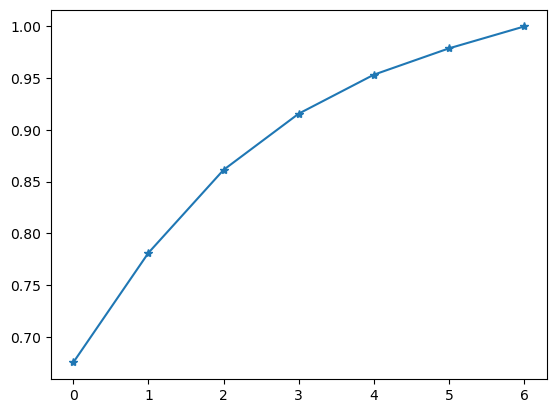

In [45]:
plt.plot(np.cumsum(pca_model.explained_variance_ratio_), marker="*")

#### Inference:
- Out of 7 features from the dataset, First 3 principal components captures >85% of variance in data
- Dimensionality reduction is possible with 4 pricipal components as it captures >95% of variance in data

Text(0, 0.5, 'Second Component')

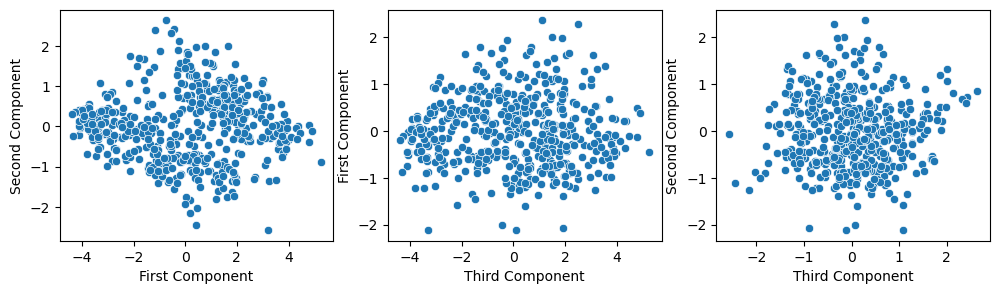

In [46]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.scatterplot(x = pca_features[:, 0], y=pca_features[:, 1])
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.subplot(1,3,2)
sns.scatterplot(x = pca_features[:, 0], y=pca_features[:, 2])
plt.xlabel("Third Component")
plt.ylabel("First Component")
plt.subplot(1,3,3)
sns.scatterplot(x = pca_features[:, 1], y=pca_features[:, 2])
plt.xlabel("Third Component")
plt.ylabel("Second Component")

# Statistical Tests
- ANOVA Test: One Way Test
    - Target Vs Numerical Features
- Contingency Test: Test of Independence
    - Between Categorical Features

## ANOVA Test

In [166]:
from scipy.stats import f_oneway, ttest_ind, chi2_contingency
from itertools import combinations

### University Rating vs Chance of Admission

In [143]:
univ_rating = [np.array(raw_df[raw_df['University Rating'] == val]['Chance of Admit ']) for val in raw_df['University Rating'].unique()]

In [146]:
f_stat, p_value = f_oneway(univ_rating[0], univ_rating[1], univ_rating[2])
if p_value < 0.05:
    print("The means of the categories of University Rating are significantly different (reject null hypothesis).")
else:
    print("No significant difference between the means of the categories of University Rating (fail to reject null hypothesis).")

The means of the categories of University Rating are significantly different (reject null hypothesis).


In [164]:
uniq_vals = list(raw_df['University Rating'].unique())
test_res = []
for i, j in list(combinations(np.arange(len(univ_rating)), 2)):
    t_stat, p_value = ttest_ind(univ_rating[i], univ_rating[j])
    if p_value < 0.05:
        test_res.append([uniq_vals[i], uniq_vals[j], "Significantly different"])
    else:
        test_res.append([uniq_vals[i], uniq_vals[j], "Not Significantly different"])
    

0 1
0 2
1 2


In [165]:
test_res

[[3, 2, 'Significantly different'],
 [3, 1, 'Significantly different'],
 [2, 1, 'Significantly different']]

### SOP vs Chance of Admission

In [148]:
sop_strength = [np.array(raw_df[raw_df['SOP'] == val]['Chance of Admit ']) for val in raw_df['SOP'].unique()]

In [149]:
f_stat, p_value = f_oneway(sop_strength[0], sop_strength[1], sop_strength[2], sop_strength[3], sop_strength[4], sop_strength[5])
if p_value < 0.05:
    print("The means of the categories of SOP are significantly different (reject null hypothesis).")
else:
    print("No significant difference between the means of the categories of SOP (fail to reject null hypothesis).")

The means of the categories of SOP are significantly different (reject null hypothesis).


### LOR vs Chance of Admission

In [152]:
lor_strength = [np.array(raw_df[raw_df['LOR '] == val]['Chance of Admit ']) for val in raw_df['LOR '].unique()]

In [154]:
f_stat, p_value = f_oneway(lor_strength[0], lor_strength[1], lor_strength[2], lor_strength[3], lor_strength[4])
if p_value < 0.05:
    print("The means of the categories of LOR are significantly different (reject null hypothesis).")
else:
    print("No significant difference between the means of the categories of LOR (fail to reject null hypothesis).")

The means of the categories of LOR are significantly different (reject null hypothesis).


#### Inference:
- Chance of admission for each Category of University Rating, LOP and SOP are significantly different indicating the segregration is proper
- 2 sample T-Test for university rating also confirms the same

## Contingency Test: Test of Independence

In [170]:
ct = pd.crosstab(raw_df['SOP'], raw_df['LOR '])
chi2_stat, p_value, dof, expected = chi2_contingency(ct)
if p_value < 0.05:
    print("SOP and LOP are not significantly independent (reject null hypothesis)")
else:
    print("SOP and LOP are significantly independenct (fail to reject null hypothesis)")

SOP and LOP are not significantly independent (reject null hypothesis)


In [172]:
ct = pd.crosstab(raw_df['University Rating'], raw_df['LOR '])
chi2_stat, p_value, dof, expected = chi2_contingency(ct)
if p_value < 0.05:
    print("University Rating and LOP are not significantly independent (reject null hypothesis)")
else:
    print("University Rating and LOP are significantly independenct (fail to reject null hypothesis)")

University Rating and LOP are not significantly independent (reject null hypothesis)


In [173]:
ct = pd.crosstab(raw_df['SOP'], raw_df['University Rating'])
chi2_stat, p_value, dof, expected = chi2_contingency(ct)
if p_value < 0.05:
    print("SOP and University Rating are not significantly independent (reject null hypothesis)")
else:
    print("SOP and University Rating are significantly independenct (fail to reject null hypothesis)")

SOP and University Rating are not significantly independent (reject null hypothesis)


#### Inference:
- The contingency test confirms that the categorical features are significantly dependent
- University Rating, LOP and SOP features are dependent with each other

# Modeling
- Train Test Split and Feature Scaling
- Linear Regression
    - Performance Analysis using MAE, MSE and Adj R2 Score
- Polynomial Regression
    - KFold CV and Hyperparameter Tuning
- Lasso Regression
- Ridge Regression

## Data Preparation for Modeling

In [133]:
raw_df['University Rating'] = df['University Rating']
raw_df['SOP'] = df['SOP']
raw_df['LOR '] = df['LOR ']
X = raw_df[num_features + cat_features]
Y = raw_df['Chance of Admit ']

In [134]:
scaler = StandardScaler()

In [135]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=101, shuffle=True)
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)
ytrain.reset_index(drop=True, inplace=True)
ytest.reset_index(drop=True, inplace=True)

In [136]:
xtrain

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
161,298,99,7.46,1,1,2,0
72,321,111,9.45,3,6,5,1
246,316,105,8.73,2,3,3,0
230,313,104,8.65,2,5,5,0
391,318,106,8.65,2,1,2,0
...,...,...,...,...,...,...,...
63,315,107,8.50,1,5,2,1
326,299,100,8.02,2,1,1,0
337,332,118,9.47,3,6,5,1
11,327,111,9.00,3,5,5,1


## Linear Regression

In [175]:
lir = LinearRegression()
lir.fit(xtrain_scaled, ytrain)

LinearRegression()

In [54]:
def adj_r2score(r2score, n, k):
    return (1-((1-r2score)*(n-1)/(n-k-1)))

In [55]:
def performance_analysis(ypred, ytrue, k=7):
    return [round(np.sqrt(mean_squared_error(ytrue, ypred)),3),\
            round(mean_absolute_error(ytrue, ypred),3),\
            round(r2_score(ytrue, ypred),3),\
            round(adj_r2score(r2_score(ytrue, ypred), len(ypred), k),3)]

In [56]:
train_score = performance_analysis(lir.predict(xtrain_scaled), ytrain, k=xtrain_scaled.shape[1])
test_score = performance_analysis(lir.predict(xtest_scaled), ytest, k=xtrain_scaled.shape[1])
lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
lir_res.head()

,MAE,RMSE,R2 Score,Adj R2 Score
Train,0.059,0.042,0.830,0.827
Test,0.061,0.044,0.777,0.760


#### Inference:
- MSE between test and train set is similar, hence there is no overfitting
- R2 score is not significant hence the performance of the model is average 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


<Axes: ylabel='Chance of Admit '>

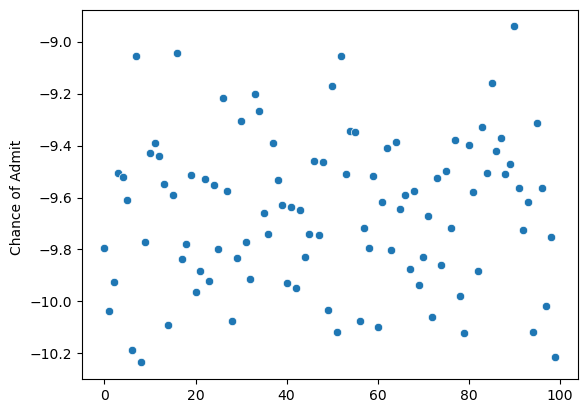

In [57]:
sns.scatterplot(x=np.arange(xtest.shape[0]), y=(ytest-lir.predict(xtest)))

Text(0, 0.5, 'Linear Regression: Co-efficients')

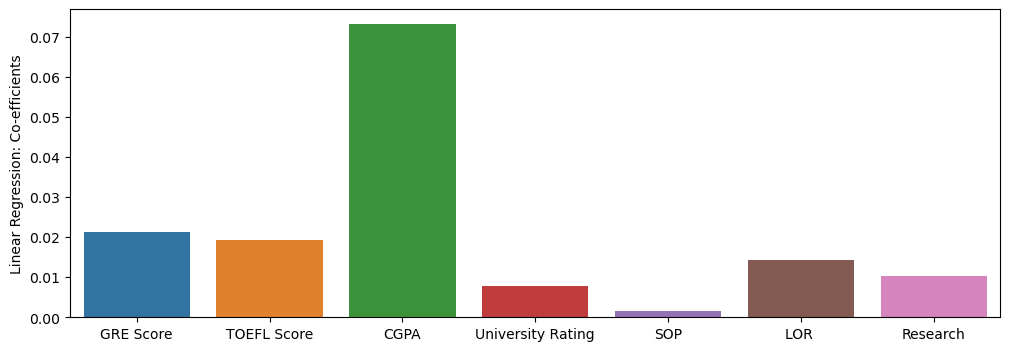

In [177]:
plt.figure(figsize=(12,4))
sns.barplot(x=list(xtrain.columns), y=lir.coef_)
plt.ylabel('Linear Regression: Co-efficients')

#### Inference:
- GRE SCore, TOEFL Score, CGPA, LOR are given higher weightage indicating the significance of the features for the prediction
- Weightages of all the features are positive indicating the positive correlation

In [59]:
lir.intercept_

0.718075

## Polynomial Regression

In [61]:
def poly_reg(xtrain, ytrain, xtest, ytest):    
    poly_lir = LinearRegression()
    poly_lir.fit(xtrain, ytrain)
    train_score = performance_analysis(poly_lir.predict(xtrain), ytrain, k=xtrain.shape[1])
    test_score = performance_analysis(poly_lir.predict(xtest), ytest, k=xtest.shape[1])
    return train_score, test_score

In [62]:
poly_reg(xtrain, ytrain, xtest, ytest)
train_score, test_score= poly_reg(xtrain, ytrain, xtest, ytest)
poly_lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
poly_lir_res.head()

,MAE,RMSE,R2 Score,Adj R2 Score
Train,0.059,0.042,0.830,0.827
Test,0.061,0.044,0.777,0.760


In [63]:
# Apply Polynomial of degree 2
poly = PolynomialFeatures(degree=2)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.transform(xtest)

#Apply Scaling
ss = StandardScaler()
xtrain_poly_scaled = ss.fit_transform(xtrain_poly)
xtest_poly_scaled = ss.transform(xtest_poly)

train_score, test_score= poly_reg(xtrain_poly_scaled, ytrain, xtest_poly_scaled, ytest)
poly_lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
poly_lir_res.head()

,MAE,RMSE,R2 Score,Adj R2 Score
Train,0.056,0.039,0.848,0.833
Test,0.063,0.047,0.767,0.634


In [64]:
#Apply Scaling
ss = StandardScaler()
xtrain_scaled = ss.fit_transform(xtrain)
xtest_scaled = ss.transform(xtest)

# Apply Polynomial of degree 2
poly = PolynomialFeatures(degree=2)
xtrain_poly_scaled = poly.fit_transform(xtrain_scaled)
xtest_poly_scaled = poly.transform(xtest_scaled)

train_score, test_score= poly_reg(xtrain_poly_scaled, ytrain, xtest_poly_scaled, ytest)
poly_lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
poly_lir_res.head()

,MAE,RMSE,R2 Score,Adj R2 Score
Train,0.056,0.039,0.848,0.833
Test,0.063,0.047,0.767,0.634


#### Inference:
- Slight improvement in RMSE with respect to linear regression
- R2 score is almost same, no improvement in the performance is evident
- Increase degree of polynomial by hyperparameter tuning

### Hyperparameter Tuning: Degree of Polynomials

In [66]:
degrees = [3, 5, 7, 9]
kf = KFold(n_splits=5)
metric = []
for deg in [2]:
    poly = PolynomialFeatures(degree=deg)
    xtrain_poly = poly.fit_transform(xtrain_scaled)
    xtest_poly = poly.transform(xtest_scaled)    
    for train_index, val_index in kf.split(xtrain_poly, ytrain):
        xtrain_slice = xtrain_poly[train_index]
        ytrain_slice = ytrain[train_index]
        xval_slice = xtrain_poly[val_index]
        yval_slice = ytrain[val_index]
        train_score, val_score = poly_reg(xtrain_slice, ytrain_slice, xval_slice, yval_slice) 
        metric.append([train_score, val_score])

In [67]:
ytrain.reset_index(drop=True)

0      0.53
1      0.93
2      0.72
3      0.73
4      0.71
       ... 
395    0.56
396    0.63
397    0.94
398    0.84
399    0.73
Name: Chance of Admit , Length: 400, dtype: float64

## Ridge Regression

In [68]:
def ridge_reg(alp, xtrain, ytrain, xtest, ytest):
    rir = Ridge(alpha=alp)
    rir.fit(xtrain, ytrain)
    train_score = performance_analysis(rir.predict(xtrain), ytrain, k=xtrain.shape[1])
    test_score = performance_analysis(rir.predict(xtest), ytest, k=xtrain.shape[1])
    return train_score, test_score

In [69]:
train_score, test_score = ridge_reg(10, xtrain_scaled, ytrain, xtest_scaled, ytest)
lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
lir_res.head()

,MAE,RMSE,R2 Score,Adj R2 Score
Train,0.059,0.042,0.830,0.827
Test,0.061,0.044,0.776,0.759


### Hyperparameter Tuning: Regularization consant
- alpha = [0.01, 0.1, 1, 10, 100]

In [70]:
def kfold_cross_val(xtrain, ytrain, k, alpha):
    kf = KFold(n_splits=k)
    metric = []
    for train_index, val_index in kf.split(xtrain, ytrain):
        xtrain_slice = xtrain[train_index]
        ytrain_slice = ytrain[train_index]
        xval_slice = xtrain[val_index]
        yval_slice = ytrain[val_index]        
        train_score, val_score = ridge_reg(alpha, xtrain_slice, ytrain_slice, xval_slice, yval_slice) 
        metric.append([train_score, val_score])
    return metric

In [71]:
alpha_list = [0.01, 0.1, 1, 10, 100]
metric_cv = []
for alpha in alpha_list:
    metric = kfold_cross_val(xtrain_scaled, ytrain, 5, alpha)
    rir_res = pd.DataFrame(data=np.mean(metric, axis=0), columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
    print(bold_start + "Performance Results with alpha = " + str(alpha) + bold_end)
    print(rir_res)
    metric_cv.append(np.mean(metric, axis=0))

Performance Results with alpha = 0.01
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8058
Performance Results with alpha = 0.1
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8058
Performance Results with alpha = 1
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0430    0.8232        0.8062
Performance Results with alpha = 10
          MAE    RMSE  R2 Score  Adj R2 Score
Train  0.0592  0.0424    0.8302        0.8264
Test   0.0598  0.0432    0.8230        0.8060
Performance Results with alpha = 100
          MAE    RMSE  R2 Score  Adj R2 Score
Train  0.0614  0.0442    0.8174        0.8134
Test   0.0616  0.0448    0.8128        0.7946


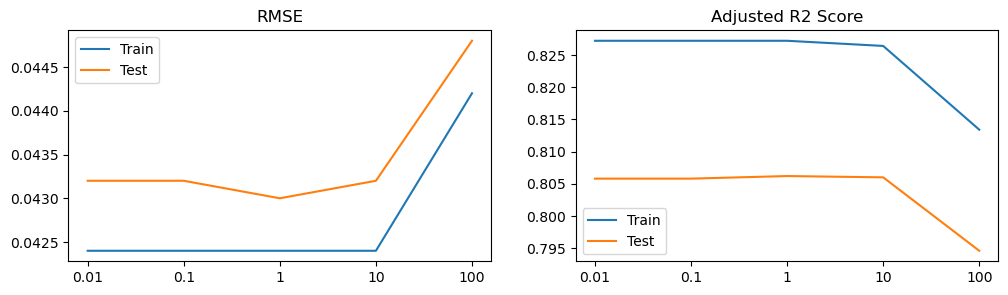

In [72]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.plot([str(i) for i in alpha_list], np.array(metric_cv)[:,0,1], label="Train")
plt.plot([str(i) for i in alpha_list], np.array(metric_cv)[:,1,1], label="Test")
plt.title('RMSE')
plt.legend()
plt.subplot(1,2,2)
plt.plot([str(i) for i in alpha_list], np.array(metric_cv)[:,0,3], label="Train")
plt.plot([str(i) for i in alpha_list], np.array(metric_cv)[:,1,3], label="Test")
plt.title('Adjusted R2 Score')
plt.legend()

#### Inference:
- No improvement in varying the regularization constant
- Increasing the regularization constant increases RMSE and decreases R2 score which is undesirable
- Ridge regression improves the performance of model significantly

## LASSO Regression

In [73]:
def lasso_reg(alp, xtrain, ytrain, xtest, ytest):
    lir = Lasso(alpha=alp)
    lir.fit(xtrain, ytrain)
    train_score = performance_analysis(lir.predict(xtrain), ytrain, k=xtrain.shape[1])
    test_score = performance_analysis(lir.predict(xtest), ytest, k=xtrain.shape[1])
    return train_score, test_score

In [74]:
train_score, test_score = lasso_reg(10, xtrain_scaled, ytrain, xtest_scaled, ytest)
lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
lir_res.head()

,MAE,RMSE,R2 Score,Adj R2 Score
Train,0.143,0.116,0.00,-0.018
Test,0.131,0.105,-0.02,-0.098


### Hyperparameter Tuning: Regularization consant
- alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

In [75]:
def kfold_cross_val(xtrain, ytrain, k, alpha):
    kf = KFold(n_splits=k)
    metric = []
    for train_index, val_index in kf.split(xtrain, ytrain):
        xtrain_slice = xtrain[train_index]
        ytrain_slice = ytrain[train_index]
        xval_slice = xtrain[val_index]
        yval_slice = ytrain[val_index]        
        train_score, val_score = lasso_reg(alpha, xtrain_slice, ytrain_slice, xval_slice, yval_slice) 
        metric.append([train_score, val_score])
    return metric

In [76]:
alpha_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
metric_cv = []
for alpha in alpha_list:
    metric = kfold_cross_val(xtrain_scaled, ytrain, 5, alpha)
    lir_res = pd.DataFrame(data=np.mean(metric, axis=0), columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
    print(bold_start + "Performance Results with alpha = " + str(alpha) + bold_end)
    print(lir_res)
    metric_cv.append(np.mean(metric, axis=0))

Performance Results with alpha = 1e-05
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8058
Performance Results with alpha = 0.0001
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8062
Performance Results with alpha = 0.001
          MAE    RMSE  R2 Score  Adj R2 Score
Train  0.0592  0.0424    0.8310        0.8272
Test   0.0598  0.0432    0.8236        0.8064
Performance Results with alpha = 0.01
          MAE    RMSE  R2 Score  Adj R2 Score
Train  0.0604  0.0436    0.8230         0.819
Test   0.0608  0.0442    0.8178         0.800
Performance Results with alpha = 0.1
          MAE    RMSE  R2 Score  Adj R2 Score
Train  0.1200  0.0972    0.2998        0.2842
Test   0.1198  0.0972    0.2994        0.2316
Performance Results with alpha = 1
          MAE    RMSE  R2 Score  Adj R2 Score
Train  0.1434  0.1164     0.000       -0.0

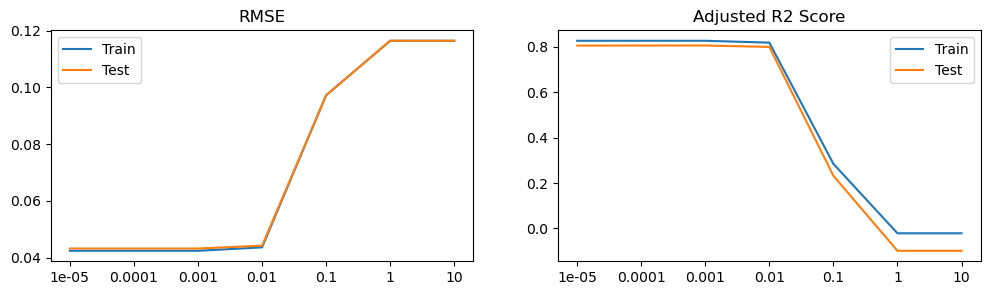

In [77]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.plot([str(i) for i in alpha_list], np.array(metric_cv)[:,0,1], label="Train")
plt.plot([str(i) for i in alpha_list], np.array(metric_cv)[:,1,1], label="Test")
plt.title('RMSE')
plt.legend()
plt.subplot(1,2,2)
plt.plot([str(i) for i in alpha_list], np.array(metric_cv)[:,0,3], label="Train")
plt.plot([str(i) for i in alpha_list], np.array(metric_cv)[:,1,3], label="Test")
plt.title('Adjusted R2 Score')
plt.legend()

In [78]:
print("Min RMSE:", np.round(min(np.array(metric_cv)[:,1,1]),2), "Reg Constant:",  alpha_list[np.argmin(np.array(metric_cv)[:,1,1])])
print("Max Adj R2 Score:",  max(np.array(metric_cv)[:,1,3]), "Reg Constant:",  alpha_list[np.argmax(np.array(metric_cv)[:,1,3])])

Min RMSE: 0.04 Reg Constant: 1e-05
Max Adj R2 Score: 0.8064 Reg Constant: 0.001


#### Inference:
- Significant improvement observed at very low regularization constant values <0.01
- Increasing the regularization constant tremendously increases RMSE and decreases R2 score
- Lasso regression shows some improvement in the r2 score compared to linear regression at alpha = 0.001

## Elastic Net Regression

In [79]:
def elastic_reg(alp, ratio, xtrain, ytrain, xtest, ytest):
    enr = ElasticNet(alpha=alp, l1_ratio=ratio)
    enr.fit(xtrain, ytrain)
    train_score = performance_analysis(enr.predict(xtrain), ytrain, k=xtrain.shape[1])
    test_score = performance_analysis(enr.predict(xtest), ytest, k=xtrain.shape[1])
    return train_score, test_score

In [80]:
train_score, test_score = elastic_reg(10, 1, xtrain_scaled, ytrain, xtest_scaled, ytest)
enr_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
enr_res.head()

,MAE,RMSE,R2 Score,Adj R2 Score
Train,0.143,0.116,0.00,-0.018
Test,0.131,0.105,-0.02,-0.098


### Hyperparameter Tuning:
- Alpha = [0.0001, 0.001, 0.01, 0.1, 1]
- l1 ratio = [0.01, 0.1, 0.5, 0.75, 1]

In [81]:
def kfold_cross_val_elas(xtrain, ytrain, k, alpha, ratio):
    kf = KFold(n_splits=k)
    metric = []
    for train_index, val_index in kf.split(xtrain, ytrain):
        xtrain_slice = xtrain[train_index]
        ytrain_slice = ytrain[train_index]
        xval_slice = xtrain[val_index]
        yval_slice = ytrain[val_index]        
        train_score, val_score = elastic_reg(alpha, ratio, xtrain_slice, ytrain_slice, xval_slice, yval_slice) 
        metric.append([train_score, val_score])
    return metric

In [82]:
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1]
ratio_list = [0.01, 0.1, 0.5, 0.75, 1]
metric_cv = []
for alpha in alpha_list:
    for ratio in ratio_list:
        metric = kfold_cross_val_elas(xtrain_scaled, ytrain, 5, alpha, ratio)
        enr_res = pd.DataFrame(data=np.mean(metric, axis=0), columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
        print(bold_start + "Performance Results with alpha = " + str(alpha) + ", l1 ratio = " + str(ratio) + bold_end)
        print(enr_res)
        metric_cv.append(np.mean(metric, axis=0))

Performance Results with alpha = 0.0001, l1 ratio = 0.01
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8058
Performance Results with alpha = 0.0001, l1 ratio = 0.1
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8058
Performance Results with alpha = 0.0001, l1 ratio = 0.5
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8062
Performance Results with alpha = 0.0001, l1 ratio = 0.75
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8062
Performance Results with alpha = 0.0001, l1 ratio = 1
         MAE    RMSE  R2 Score  Adj R2 Score
Train  0.059  0.0424    0.8312        0.8272
Test   0.060  0.0432    0.8232        0.8062
Performance Results with alpha = 0.001, l1 ra

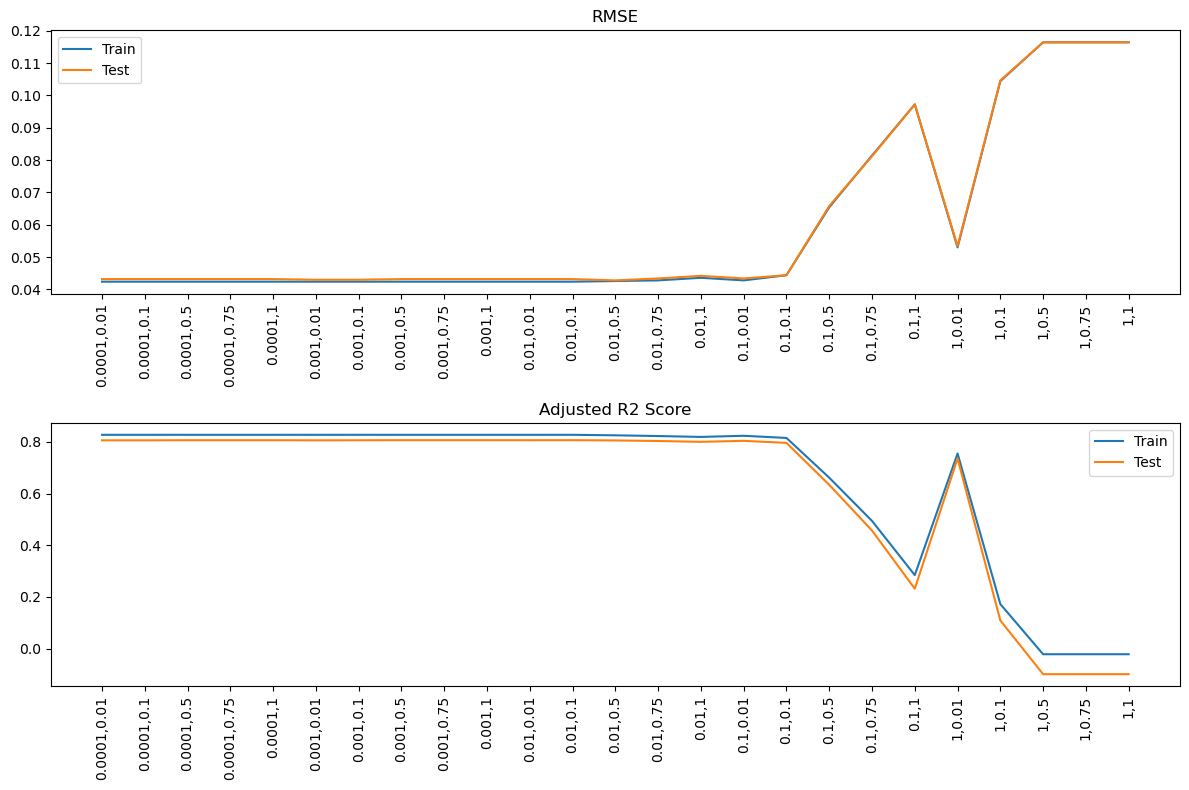

In [83]:
labels = [",".join([str(i),str(j)]) for i in alpha_list for j in ratio_list]
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(labels, np.array(metric_cv)[:,0,1], label="Train")
plt.plot(labels, np.array(metric_cv)[:,1,1], label="Test")
plt.title('RMSE')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(2,1,2)
plt.plot(labels, np.array(metric_cv)[:,0,3], label="Train")
plt.plot(labels, np.array(metric_cv)[:,1,3], label="Test")
plt.title('Adjusted R2 Score')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

In [84]:
print("Min RMSE:", np.round(min(np.array(metric_cv)[:,1,1]),2), "Max R2 Score:",  max(np.array(metric_cv)[:,1,3]))

Min RMSE: 0.04 Max R2 Score: 0.8064


In [85]:
print("Min RMSE:", np.round(min(np.array(metric_cv)[:,1,1]),2), "Reg Constant:",  labels[np.argmin(np.array(metric_cv)[:,1,1])].split(","))
print("Max Adj R2 Score:",  max(np.array(metric_cv)[:,1,3]), "Reg Constant:",  labels[np.argmax(np.array(metric_cv)[:,1,3])].split(","))

Min RMSE: 0.04 Reg Constant: ['0.01', '0.5']
Max Adj R2 Score: 0.8064 Reg Constant: ['0.001', '0.5']


#### Inference:
- Significant improvement observed at very low regularization alpha values <0.01 and ratio = 0.5
- Increasing the alpha tremendously increases RMSE and decreases R2 score
- Elastic net regression shows similar improvement as that of lasso regression at alpha in range 0.01 - 0.001 and l1_ratio = 0.5

# Assumptions of Linear Regression
- Multicollinearity Analysis
- Residual plot Analysis
- Linearity of variables
- Test for Homoscedasticity
- Normality of residuals

## Multicollinearity Analysis

In [86]:
VIF = [variance_inflation_factor(xtrain, i) for i in range(len(xtrain.columns))]
print([(list(xtrain.columns)[i],  VIF[i]) for i in range(len(xtrain.columns))])

[('GRE Score', 1320.463129851432), ('TOEFL Score', 1224.5392331156734), ('CGPA', 921.83366405054), ('University Rating', 21.819465877411755), ('SOP', 35.23376460964398), ('LOR ', 31.442054746602892), ('Research', 2.7925969690879637)]


<Axes: >

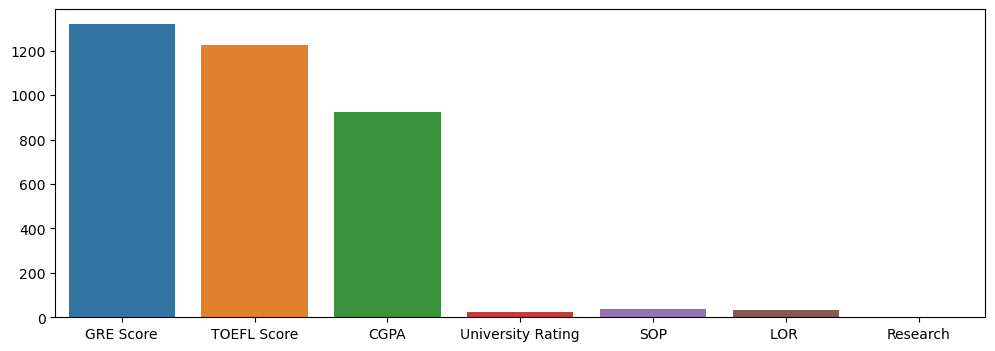

In [87]:
plt.figure(figsize=(12,4))
sns.barplot(x=list(xtrain.columns), y = VIF)

#### Inference:
- GRE, TOEFL Score and CGPA having very high VIF value indicating the high linear dependency of the features

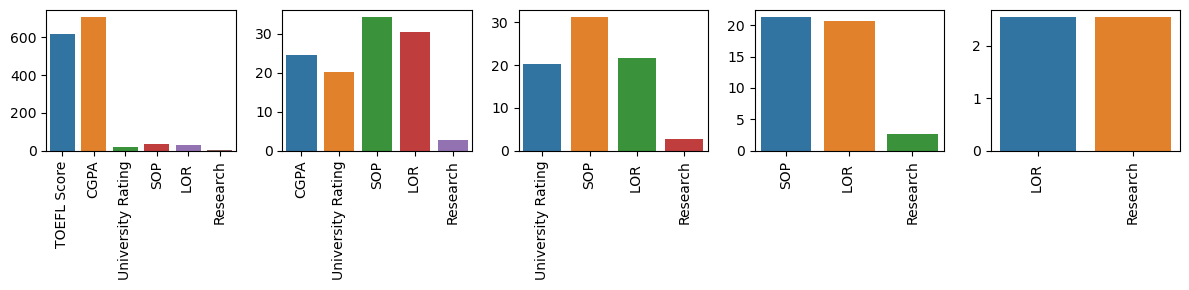

In [115]:
xtrain_new = xtrain.copy()
cols = list(xtrain_new.columns)
plt.figure(figsize=(12,3))
for i in range(len(cols)-2):
    xtrain_new.drop(cols[i], axis=1, inplace= True)
    plt.subplot(1,5,i+1)
    VIF = [variance_inflation_factor(xtrain_new, i) for i in range(len(xtrain_new.columns))]
    #print([(list(xtrain_new.columns)[i],  VIF[i]) for i in range(len(xtrain_new.columns))])
    sns.barplot(x=list(xtrain_new.columns), y = VIF)
    plt.xticks(rotation=90)
plt.tight_layout()

#### Inference:
- Without GRE Score, VIF is not changed significantly for other features
- Without GRE and TOEFL Score, VIF is drastically reduced for CGPA indicating the dependency of the 3 features
- Removing University rating and SOP, VIF of LOR is drastically reducted indicating the dependency of the 3 features
- Except research, all other features are having linear dependency with other features

In [89]:
xtrain_new = xtrain.copy()
xtest_new = xtest.copy()
cols = list(xtrain_new.columns)

for i in range(len(cols)-1): 
    xtrain_new.drop(cols[i], axis=1, inplace= True)
    xtest_new.drop(cols[i], axis=1, inplace= True)
    ss = StandardScaler()    
    lir = LinearRegression()
    lir.fit(ss.fit_transform(xtrain_new), ytrain)
    train_score = performance_analysis(lir.predict(ss.transform(xtrain_new)), ytrain, k=xtrain_new.shape[1])
    test_score = performance_analysis(lir.predict(ss.transform(xtest_new)), ytest, k=xtrain_new.shape[1])
    lir_res = pd.DataFrame(data=[train_score, test_score], columns=['MAE', 'RMSE', 'R2 Score', 'Adj R2 Score'], index=['Train', 'Test'])
    print(bold_start + "Performance of Linear Regression without " + cols[i] + ":" + bold_end)
    print(lir_res)
    

Performance of Linear Regression without GRE Score:
         MAE   RMSE  R2 Score  Adj R2 Score
Train  0.060  0.044     0.825         0.822
Test   0.062  0.045     0.773         0.758
Performance of Linear Regression without TOEFL Score:
         MAE   RMSE  R2 Score  Adj R2 Score
Train  0.062  0.045     0.812         0.810
Test   0.062  0.046     0.770         0.758
Performance of Linear Regression without CGPA:
         MAE   RMSE  R2 Score  Adj R2 Score
Train  0.085  0.065     0.647         0.643
Test   0.088  0.068     0.544         0.525
Performance of Linear Regression without University Rating:
         MAE   RMSE  R2 Score  Adj R2 Score
Train  0.090  0.068     0.609         0.606
Test   0.088  0.069     0.541         0.526
Performance of Linear Regression without SOP:
         MAE   RMSE  R2 Score  Adj R2 Score
Train  0.097  0.077     0.544         0.542
Test   0.099  0.080     0.416         0.404
Performance of Linear Regression without LOR :
         MAE   RMSE  R2 Score  Adj

#### Inference:
- Removing collinear features doesn't improve the performance but slightly reducing the performance

## Linearity Analysis

In [90]:
raw_df.corr().iloc[1:-1,-1]

GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Name: Chance of Admit , dtype: float64

## Residual Plot Analysis

Text(0.5, 1.0, 'Residual Plot: Test Set')

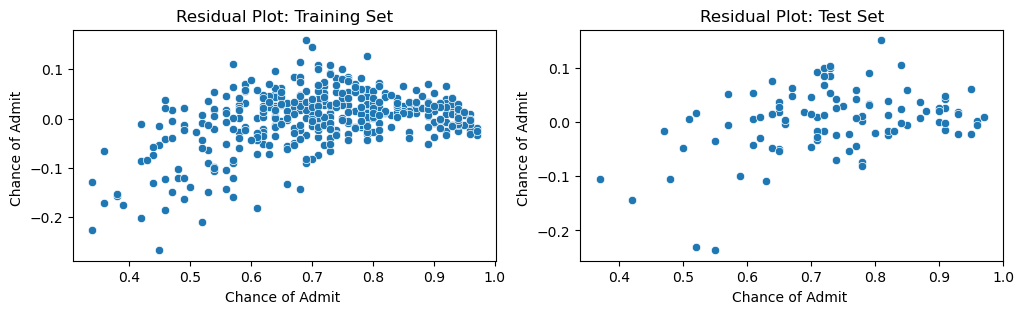

In [93]:
lir = LinearRegression()
lir.fit(xtrain_scaled, ytrain)
ypred = lir.predict(xtrain_scaled)
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.scatterplot(x=ytrain, y = ytrain - lir.predict(xtrain_scaled))
plt.title('Residual Plot: Training Set')
plt.subplot(1,2,2)
sns.scatterplot(x=ytest, y = ytest - lir.predict(xtest_scaled))
plt.title('Residual Plot: Test Set')

#### Inference:
- All the features have high correlation with Target variable  
- A clear curvature in the residuals indicates non-linearity
- Non linear models is required to capture the non linearity in the data

## Normality of Residuals

In [100]:
#Side By Side Plot
def hist_box_plot(data, title):
    plt.figure(figsize=(12,3))
    plt.suptitle(title)
    plt.subplot(1,2,1)
    sns.histplot(data, kde=True, bins=20)
    plt.subplot(1,2,2)
    sns.boxplot(data)
    plt.xlabel('Residuals')

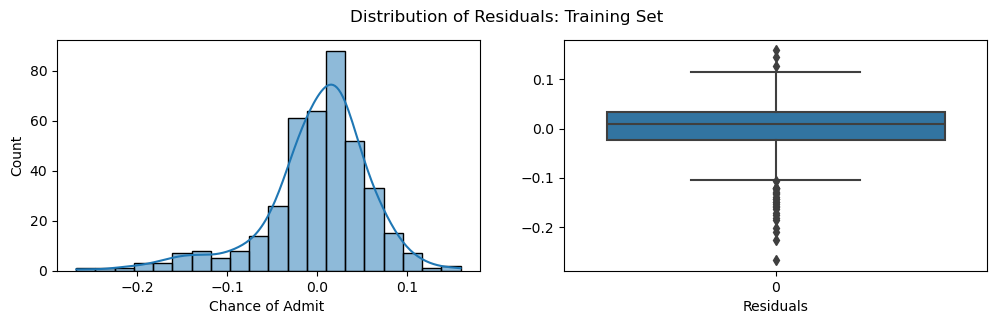

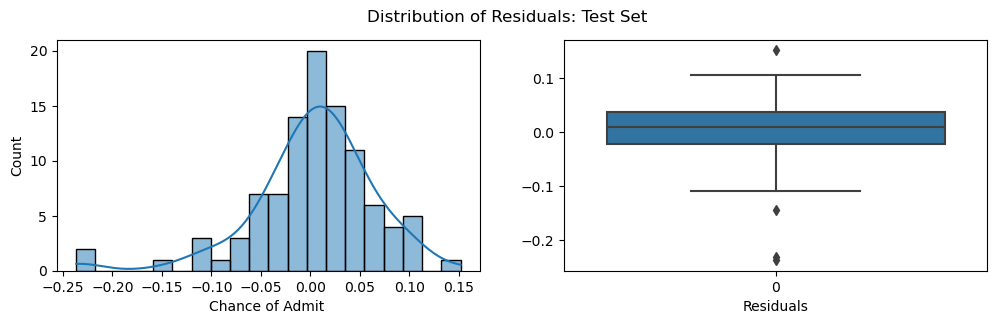

In [101]:
hist_box_plot(ytrain - lir.predict(xtrain_scaled), 'Distribution of Residuals: Training Set')
hist_box_plot(ytest - lir.predict(xtest_scaled), 'Distribution of Residuals: Test Set')

#### Inference:
- Residual is almost normally distributed with slight skew
- It satisfies the assumption of linear regression the normal distribution of residuals 

# Insights

- **Data Characteristics**
	- ***Serial No.***: 
		- All are Unique values might not be helpful for prediction, hence should be ignored before prediction
	- ***GRE Score, TOEFL Score***: 
		- Mean ~= Median indicating Central Tendency
		- Data is distributed normally and having spread out peak or flat peak
		- No gaps in distribution plot indicates the data is Continuous with no missing range 
	- ***Cumulative Grade Point Average (CGPA)***: 
		- Ranges from 6.8 to 9.92, 
		- Data is distributed normally and having sharp peak
		- Gap between 7 and 7.5 in the distribution plot indicates the missing range in the data
	- ***University Rating***: 
		- Ordinal Feature ranges from 1 to 5
		- Ratings in the range 2-4 being 80% of proportion
		- Average rated universities (3) are the most in dataset
	- ***Statement of Purpose (SOP)***: 
		- Ordinal Feature ranges from 1 to 5 with resolution 0.5
		- Strength in the range 2.5-4.5 being 80% of proportion
		- Lowest strength (1) is neglegible (1.2%) and can be ignored or merged
	- ***Letter of Recommendation (LOR)***: 
		- Ordinal Feature ranges from 1 to 5 with resolution 0.5
		- Strength in the range 3-4 being ~60% of proportion
		- Lowest strength (1) is neglegible (0.2%)
	- ***Research***: 
		- Binary categorical feature with equal distribution
    - ***Change of Admit***: 
		- Probability of getting Admission ranges from 0.4 to 1
- **Exploratory Data Analysis**	
	- `No null values and no iqr outliers` are identified indicating clean dataset
	- Students from `universities with higher ratings (3+) are more likely to have research experience`
	- Students `having research experience are more likely to have higher SOP and LOR strengths (3+)`
	- Students `having research experience are mostly likely to get higher scores in GRE, TOEFL and Curriculum`
	- Strength of relationship between categorical features: (University rating and SOP) > (University rating and LOR) > (SOP and LOR)
	- All 3 numerical features are highly linearly correlated
	- Students `having high CGPA are more likely to have higher GRE and TOEFL Score`
	- Students `scored more in the GRE, TOEFL and Curriculum are having higher SOP strength, LOR strength`
	- `Balanced distribution of the target` is observed for <0.5 (~50%) and > 0.5 (~50%)
	- `GRE Score, TOEFL Score and CGPA all are linearly correlated with Chance of getting Admission`
	- University rating, SOP, LOR and Research experience are positively and linearly correlated with Chance of Admission
	- ***PCA Analysis:***
		- The first principal component from PCA explains approximately 65% of the variance in the data
		- `The first principal component is constructed with nearly equal contributions from all features in the dataset`
		- Out of 7 features from the dataset, First 3 principal components captures >85% of variance in data
	- ***Statistical Tests:***
		- Chance of admission for each Category of `University Rating, LOR and SOP are significantly different` indicating the segregration is independent
		- The contingency test confirms that the `categorical features (University Rating, LOR and SOP) are significantly dependent on each other`
	- ***Linear Regression:***
		- Train: RMSE = 0.042, `R2 Score = 0.83`, Adj. R2 Score = 0.83
		  Test:  RMSE = 0.044, `R2 Score = 0.77`, Adj. R2 Score = 0.76
		- `Moderate performance` of the model
		- Based on the coefficients, `GRE SCore, TOEFL Score, CGPA, LOR are given higher weightage indicating the significance of the features` for the prediction
		- Weightages of all the features are positive indicating the positive correlation		
	- ***Polynomial Regression: (Degree = 2)***
		- Train: RMSE = 0.039, `R2 Score = 0.84`, Adj. R2 Score = 0.83
		  Test:  RMSE = 0.047, `R2 Score = 0.76`, Adj. R2 Score = 0.634
		- `Doesn't improve the performance` much
		- `Slightly overfits` based on the Train and Test RMSE
	- ***Ridge Regression:***
		- Train: RMSE = 0.042, `R2 Score = 0.83`, Adj. R2 Score = 0.83
		  Test:  RMSE = 0.044, `R2 Score = 0.77`, Adj. R2 Score = 0.76	
		- The test `performance of the model improves significantly compared to Linear Regression model`(7% improvement)
		- Increasing the regularization constant  increases RMSE and decreases R2 score which is undesirable
	- ***Lasso Regression:***
		- Train: RMSE = 0.042, `R2 Score = 0.83`, Adj. R2 Score = 0.82
		  Test:  RMSE = 0.043, `R2 Score = 0.82`, Adj. R2 Score = 0.80	
		- The test `performance of the  model improves significantly compared to Linear Regression model`(7% improvement) but same as that of Ridge
		- Increasing the regularization constant drastically increases RMSE and decreases R2 score which is undesirable		
		- Significant improvement observed at very low regularization constant values (<0.01)
	- ***Elastic Net Regression:***
		- Similar performance as that of Ridge and Lasso Regression, no significant improvement observed
	- ***Multicollinearity Analysis:***
		- GRE, TOEFL Score and CGPA having very high VIF value indicating the high linear dependency between the features
		- Without GRE and TOEFL Score, VIF is drastically reduced for CGPA indicating the dependency of the 3 features
		- Without University rating and SOP, VIF of LOR is drastically reducted indicating the dependency of the 3 features
	- `Removing collinear features doesn't improve the performance of linear regression model` but slightly reduces its performance
	- All the features have high correlation with Target variable and `the clear curvature in the residuals plot indicates non-linearity`
	- Residual is almost normally distributed with slight skew

# Recommendations

- **Data Preprocessing:**
	- As the population of certain categories are less in the following categorical features, categories can be merged
		- SOP: Ratings 1, 1.5 and 2.0 can be merged, 4.5 and 5.0 can be merged
		- LOR: Ratings 1, 1.5, 2.0 and 2.5 can be merged, 4.5 and 5.0 can be merged
		- University Rating: Ratings 1 and 2 can be merged, 4 and 5 can be merged
	- Transform all the ratings to ordinal categorical data
- **Modeling:**
	- Simple `Linear Regression model provides mediocre performance` hence non linear model can be applied
	- `Polynomial Regressiuon of degree 2 also doesn't improve the performance`, higher degree can be tried. However, model overfitting behaviour should be monitored
	- In the family of linear models, `Ridge Regression provides better performance (7% improvement compared to Linear Regression) at alpha <= 0.1`
	- A clear curvature in the residuals plot indicates non-linearity of the data, hence `non linear model is required to improve the performance of the model`

# Prepared By Muthukumar G